# Table of Contents: <a class="anchor" id="contents"></a>

## [Required User Input: Path for Plots and Charts](#requiredinput)

* [Importing and Cleaning Data](#import)
* [Function Definitions](#funcdef)
    * [Recursive Feature Elimination (RFE) with Features and Target](#rfe)
    * [Cross Validated ROC Chart](#cvroc)
* [Target: HNHC](#hnhc)
    * [Logistic Regression RFE - HNHC](#lrhnhc)
    * [Logistic Regression RFE - HNHC without 'los'](#lrhnhcwolos)
    * [Decision Tree Classifier RFE - HNHC](#dtchnhc)
    * [Decision Tree Classifier RFE - HNHC without 'los'](#dtchnhcwolos)
    * [XGBoost Classifier RFE - HNHC](#xgbchnhc)
    * [XGBoost Classifier RFE - HNHC without 'los'](#xgbchnhcwolos)
* [Target: READM_NINETY_DAYS](#ninety)
    * [Logistic Regression RFE - READM_NINETY_DAYS](#lrninety)
    * [Decision Tree Classifier RFE - READM_NINETY_DAYS](#dtcninety)
    * [XGBoost Classifier RFE - READM_NINETY_DAYS](#xgbcninety)

## Importing and cleaning data <a class="anchor" id="import"></a>

[Return to Table of Contents](#contents)

In [1]:
# Import dependencies.
from sklearn import tree, metrics, model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import roc_curve, plot_roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from numpy import interp
import os
from os import path
import getpass
import warnings
import dask.dataframe as dd
from IPython.display import display 
from tqdm.auto import tqdm
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

# Required User Input: Path for Plots and Charts <a class="anchor" id="requiredinput"></a>

[Return to Table of Contents](#contents)

In [2]:
# Get the current user's computer name.
pc_name = getpass.getuser()

#############################
'''SET PATH TO SAVE IMAGES'''
#############################
# Set 'PATH' as the path to where any plots/charts should be saved.
# Default path set to desktop:
PATH = f'C:/Users/{pc_name}/Desktop/VA_ML_Research/UCSD_NRD_2017'

# Path to where plots/charts will be saved.
images_folder = f'{PATH}/images'

# If the folder already exists, pass through. If the folder does not exist, create the folder.
if path.exists(images_folder):
    # Pass through.
    pass
else:
    # Create a folder to save plots/charts in.
    os.makedirs(images_folder)

In [3]:
# Read in the data as a dataframe.
df = pd.read_csv('data/NRD 2013 (machine learning).csv')
df.head()

,index,age,aweekend,died,discwt,dispuniform,dmonth,dqtr,drg,drgver,drg_nopoa,dx1,dx2,dx3,dx4,dx5,dx6,dx7,dx8,dx9,dx10,dx11,dx12,dx13,dx14,dx15,dx16,dx17,dx18,dx19,dx20,dx21,dx22,dx23,dx24,dx25,dxccs1,dxccs2,dxccs3,dxccs4,dxccs5,dxccs6,dxccs7,dxccs8,dxccs9,dxccs10,dxccs11,dxccs12,dxccs13,dxccs14,dxccs15,dxccs16,dxccs17,dxccs18,dxccs19,dxccs20,dxccs21,dxccs22,dxccs23,dxccs24,dxccs25,elective,female,hcup_ed,hosp_nrd,key_nrd,los,mdc,mdc_nopoa,nchronic,ndx,necode,npr,nrd_daystoevent,nrd_stratum,nrd_visitlink,orproc,pay1,pl_nchs,pr1,pr2,pr3,pr4,pr5,pr6,pr7,pr8,pr9,pr10,pr11,pr12,pr13,pr14,pr15,prccs1,prccs2,prccs3,prccs4,prccs5,prccs6,prccs7,prccs8,prccs9,prccs10,prccs11,prccs12,prccs13,prccs14,prccs15,rehabtransfer,resident,samedayevent,totchg,year,zipinc_qrtl,aprdrg,aprdrg_risk_mortality,aprdrg_severity,cm_aids,cm_alcohol,cm_anemdef,cm_arth,cm_bldloss,cm_chf,cm_chrnlung,cm_coag,cm_depress,cm_dm,cm_dmcx,cm_drug,cm_htn_c,cm_hypothy,cm_liver,cm_lymph,cm_lytes,cm_mets,cm_neuro,cm_obese,cm_para,cm_perivasc,cm_psych,cm_pulmcirc,cm_renlfail,cm_tumor,cm_ulcer,cm_valve,cm_wghtloss,diabetes,copd,cm_smoking,ibd_dx_index,crohn_index,hosp_bedsize,h_contrl,hosp_urcat4,hosp_ur_teach,n_disc_u,n_hosp_u,s_disc_u,s_hosp_u,total_disc,hosp_urban_rural_location,payer,ccr_nrd,wageindex,_merge,inpt_charges,ibd,ibd_flag,total_adm_num,ibd_adm_num,ibd_adm_total,ibd_index_hosp,ibd_index_six_months,ibd_index_death,ibd_index_after_june,ibd_index_flag_exclude,ibd_min_dmonth,ibd_total_los,dmonth_dead,dmonth_dead_fu,ibd_fu_v1,ibd_fu_v2,ibd_alive_fu,before_ibd_index_adm,total_before_ibd_index,before_ibd_index,ibdtotaladm_from_index,ibdtotlos_alive_fu,ibdtotadm_alive_fu,ibd_total_charges,ibdtotcharges_alive_fu,age_group,young_quintile,young_quintile_flag,sum_young,middle_quintile,middle_quintile_flag,sum_middle,old_quintile,old_quintile_flag,sum_old,ibd_young_quartile,ibd_middle_quartile,ibd_old_quartile,tot_ibd_death,gi_or_hepatic_proc_index,blood_transfusion,parenteral_or_enteral_index,ibd_procedures,tot_gi_or_hepatic_proc,max_nrd_daystoevent,ibd_max_daystoevent,ibd_readm,ibd_tot_readm,ibd_net_readm,ibd_colostomy_adm,tot_colostomy_adm,ibd_ileostomy_adm,tot_ileoostomy_adm,ibd_smallbowelresect_adm,tot_smallbowelresect_adm,ibd_colonresect_adm,tot_colonresect_adm,ibd_localexcise_adm,tot_localexcise_adm,ibd_exlap_adm,tot_exlap_adm,ibd_lysis_adm,tot_lysis_adm,tot_blood_transfusion,tot_parenteral_or_enteral,tot_ibd_procedures,cc_mi,cc_chf,cc_pervasc,cc_cvd,cc_dementia,cc_pulm,cc_rheumatic,cc_pud,cc_mild_liver,cc_dm_wocomp,cc_dm_w_comp,cc_hemi_or_para,cc_renal,cc_malignancy,cc_mod_severe_liver,cc_met_solidtumor,cc_aids_hiv,cc_index,new_cc_index,fractures,thromboses,tot_thromboses,unplanned_adm,tot_unplanned,pq1_dm_short,pq2_perf_appendix,pq3_dm_long,pq5_copd_asthma,pq7_htn,cardiac,pq8_chf,pq10_dehydrate,pq11_bacterialpna,pq12_uti,pq13_angina,pq14_diabeteswocomp,pq15_asthma,pq16_dm_amputate,dm,top_quintile_flag,ibd_young_quintile,ibd_middle_quintile,ibd_old_quintile,dibd_young_quintile,dibd_middle_quintile,dibd_old_quintile,top_ibd,top_decile_ibd,new_mi_adm,new_chf_adm,new_unstableangina_adm,new_arrhythmia_adm,new_cardiacarrest_adm,new_meningitis_adm,new_encephalitis_adm,new_endocarditis_adm,new_pneumonia_adm,new_pyelonephritis_adm,new_osteo_adm,new_septicemia_adm,new_cdiff_adm,new_tb_adm,new_atypicalmyco_adm,new_fungal_adm,new_listeriosis_adm,new_leishmaniasis_adm,new_pcp_adm,chronic_pain,ibd_surgery_adm,tot_surgery_adm,tot_pq1,tot_pq2,tot_pq3,frailty_risk_score,frailty_risk_category,frailty_risk_category_index,prevent_readm,tot_prevent_readm,cardiac_adm,cvd_adm,resp_adm,infxn_adm,gu_adm,gi_adm,endo_adm,neuro_adm,malignancies_adm,fracture_adm,thrombosis_adm,ibd_specific_adm,others_adm,ibd_index_discharge_date,readmission_time,was_readmitted,died_in_sixmo,did_die_in_sixmo,unplanned_in_sixmo,did_unplanned_in_sixmo,prevent_in_sixmo,did_prevent_in_sixmo,proc_in_sixmo,did_proc_in_sixmo,surgery_in_sixmo,did_surgery_in_sixmo,survtime,censor_readm,death_time,censor_death,surgtim

In [4]:
# Look at the ibd_specific_adm column.
df['ibd_specific_adm']

0        0
1        0
2        0
3        1
4        1
        ..
94493    1
94494    0
94495    0
94496    0
94497    1
Name: ibd_specific_adm, Length: 94498, dtype: int64

In [5]:
# Make a copy of the dataframe.
df_copy = df.copy()
df_copy.head()

,index,age,aweekend,died,discwt,dispuniform,dmonth,dqtr,drg,drgver,drg_nopoa,dx1,dx2,dx3,dx4,dx5,dx6,dx7,dx8,dx9,dx10,dx11,dx12,dx13,dx14,dx15,dx16,dx17,dx18,dx19,dx20,dx21,dx22,dx23,dx24,dx25,dxccs1,dxccs2,dxccs3,dxccs4,dxccs5,dxccs6,dxccs7,dxccs8,dxccs9,dxccs10,dxccs11,dxccs12,dxccs13,dxccs14,dxccs15,dxccs16,dxccs17,dxccs18,dxccs19,dxccs20,dxccs21,dxccs22,dxccs23,dxccs24,dxccs25,elective,female,hcup_ed,hosp_nrd,key_nrd,los,mdc,mdc_nopoa,nchronic,ndx,necode,npr,nrd_daystoevent,nrd_stratum,nrd_visitlink,orproc,pay1,pl_nchs,pr1,pr2,pr3,pr4,pr5,pr6,pr7,pr8,pr9,pr10,pr11,pr12,pr13,pr14,pr15,prccs1,prccs2,prccs3,prccs4,prccs5,prccs6,prccs7,prccs8,prccs9,prccs10,prccs11,prccs12,prccs13,prccs14,prccs15,rehabtransfer,resident,samedayevent,totchg,year,zipinc_qrtl,aprdrg,aprdrg_risk_mortality,aprdrg_severity,cm_aids,cm_alcohol,cm_anemdef,cm_arth,cm_bldloss,cm_chf,cm_chrnlung,cm_coag,cm_depress,cm_dm,cm_dmcx,cm_drug,cm_htn_c,cm_hypothy,cm_liver,cm_lymph,cm_lytes,cm_mets,cm_neuro,cm_obese,cm_para,cm_perivasc,cm_psych,cm_pulmcirc,cm_renlfail,cm_tumor,cm_ulcer,cm_valve,cm_wghtloss,diabetes,copd,cm_smoking,ibd_dx_index,crohn_index,hosp_bedsize,h_contrl,hosp_urcat4,hosp_ur_teach,n_disc_u,n_hosp_u,s_disc_u,s_hosp_u,total_disc,hosp_urban_rural_location,payer,ccr_nrd,wageindex,_merge,inpt_charges,ibd,ibd_flag,total_adm_num,ibd_adm_num,ibd_adm_total,ibd_index_hosp,ibd_index_six_months,ibd_index_death,ibd_index_after_june,ibd_index_flag_exclude,ibd_min_dmonth,ibd_total_los,dmonth_dead,dmonth_dead_fu,ibd_fu_v1,ibd_fu_v2,ibd_alive_fu,before_ibd_index_adm,total_before_ibd_index,before_ibd_index,ibdtotaladm_from_index,ibdtotlos_alive_fu,ibdtotadm_alive_fu,ibd_total_charges,ibdtotcharges_alive_fu,age_group,young_quintile,young_quintile_flag,sum_young,middle_quintile,middle_quintile_flag,sum_middle,old_quintile,old_quintile_flag,sum_old,ibd_young_quartile,ibd_middle_quartile,ibd_old_quartile,tot_ibd_death,gi_or_hepatic_proc_index,blood_transfusion,parenteral_or_enteral_index,ibd_procedures,tot_gi_or_hepatic_proc,max_nrd_daystoevent,ibd_max_daystoevent,ibd_readm,ibd_tot_readm,ibd_net_readm,ibd_colostomy_adm,tot_colostomy_adm,ibd_ileostomy_adm,tot_ileoostomy_adm,ibd_smallbowelresect_adm,tot_smallbowelresect_adm,ibd_colonresect_adm,tot_colonresect_adm,ibd_localexcise_adm,tot_localexcise_adm,ibd_exlap_adm,tot_exlap_adm,ibd_lysis_adm,tot_lysis_adm,tot_blood_transfusion,tot_parenteral_or_enteral,tot_ibd_procedures,cc_mi,cc_chf,cc_pervasc,cc_cvd,cc_dementia,cc_pulm,cc_rheumatic,cc_pud,cc_mild_liver,cc_dm_wocomp,cc_dm_w_comp,cc_hemi_or_para,cc_renal,cc_malignancy,cc_mod_severe_liver,cc_met_solidtumor,cc_aids_hiv,cc_index,new_cc_index,fractures,thromboses,tot_thromboses,unplanned_adm,tot_unplanned,pq1_dm_short,pq2_perf_appendix,pq3_dm_long,pq5_copd_asthma,pq7_htn,cardiac,pq8_chf,pq10_dehydrate,pq11_bacterialpna,pq12_uti,pq13_angina,pq14_diabeteswocomp,pq15_asthma,pq16_dm_amputate,dm,top_quintile_flag,ibd_young_quintile,ibd_middle_quintile,ibd_old_quintile,dibd_young_quintile,dibd_middle_quintile,dibd_old_quintile,top_ibd,top_decile_ibd,new_mi_adm,new_chf_adm,new_unstableangina_adm,new_arrhythmia_adm,new_cardiacarrest_adm,new_meningitis_adm,new_encephalitis_adm,new_endocarditis_adm,new_pneumonia_adm,new_pyelonephritis_adm,new_osteo_adm,new_septicemia_adm,new_cdiff_adm,new_tb_adm,new_atypicalmyco_adm,new_fungal_adm,new_listeriosis_adm,new_leishmaniasis_adm,new_pcp_adm,chronic_pain,ibd_surgery_adm,tot_surgery_adm,tot_pq1,tot_pq2,tot_pq3,frailty_risk_score,frailty_risk_category,frailty_risk_category_index,prevent_readm,tot_prevent_readm,cardiac_adm,cvd_adm,resp_adm,infxn_adm,gu_adm,gi_adm,endo_adm,neuro_adm,malignancies_adm,fracture_adm,thrombosis_adm,ibd_specific_adm,others_adm,ibd_index_discharge_date,readmission_time,was_readmitted,died_in_sixmo,did_die_in_sixmo,unplanned_in_sixmo,did_unplanned_in_sixmo,prevent_in_sixmo,did_prevent_in_sixmo,proc_in_sixmo,did_proc_in_sixmo,surgery_in_sixmo,did_surgery_in_sixmo,survtime,censor_readm,death_time,censor_death,surgtim

In [6]:
# Check the back end of the data.
df_copy.tail()

,index,age,aweekend,died,discwt,dispuniform,dmonth,dqtr,drg,drgver,drg_nopoa,dx1,dx2,dx3,dx4,dx5,dx6,dx7,dx8,dx9,dx10,dx11,dx12,dx13,dx14,dx15,dx16,dx17,dx18,dx19,dx20,dx21,dx22,dx23,dx24,dx25,dxccs1,dxccs2,dxccs3,dxccs4,dxccs5,dxccs6,dxccs7,dxccs8,dxccs9,dxccs10,dxccs11,dxccs12,dxccs13,dxccs14,dxccs15,dxccs16,dxccs17,dxccs18,dxccs19,dxccs20,dxccs21,dxccs22,dxccs23,dxccs24,dxccs25,elective,female,hcup_ed,hosp_nrd,key_nrd,los,mdc,mdc_nopoa,nchronic,ndx,necode,npr,nrd_daystoevent,nrd_stratum,nrd_visitlink,orproc,pay1,pl_nchs,pr1,pr2,pr3,pr4,pr5,pr6,pr7,pr8,pr9,pr10,pr11,pr12,pr13,pr14,pr15,prccs1,prccs2,prccs3,prccs4,prccs5,prccs6,prccs7,prccs8,prccs9,prccs10,prccs11,prccs12,prccs13,prccs14,prccs15,rehabtransfer,resident,samedayevent,totchg,year,zipinc_qrtl,aprdrg,aprdrg_risk_mortality,aprdrg_severity,cm_aids,cm_alcohol,cm_anemdef,cm_arth,cm_bldloss,cm_chf,cm_chrnlung,cm_coag,cm_depress,cm_dm,cm_dmcx,cm_drug,cm_htn_c,cm_hypothy,cm_liver,cm_lymph,cm_lytes,cm_mets,cm_neuro,cm_obese,cm_para,cm_perivasc,cm_psych,cm_pulmcirc,cm_renlfail,cm_tumor,cm_ulcer,cm_valve,cm_wghtloss,diabetes,copd,cm_smoking,ibd_dx_index,crohn_index,hosp_bedsize,h_contrl,hosp_urcat4,hosp_ur_teach,n_disc_u,n_hosp_u,s_disc_u,s_hosp_u,total_disc,hosp_urban_rural_location,payer,ccr_nrd,wageindex,_merge,inpt_charges,ibd,ibd_flag,total_adm_num,ibd_adm_num,ibd_adm_total,ibd_index_hosp,ibd_index_six_months,ibd_index_death,ibd_index_after_june,ibd_index_flag_exclude,ibd_min_dmonth,ibd_total_los,dmonth_dead,dmonth_dead_fu,ibd_fu_v1,ibd_fu_v2,ibd_alive_fu,before_ibd_index_adm,total_before_ibd_index,before_ibd_index,ibdtotaladm_from_index,ibdtotlos_alive_fu,ibdtotadm_alive_fu,ibd_total_charges,ibdtotcharges_alive_fu,age_group,young_quintile,young_quintile_flag,sum_young,middle_quintile,middle_quintile_flag,sum_middle,old_quintile,old_quintile_flag,sum_old,ibd_young_quartile,ibd_middle_quartile,ibd_old_quartile,tot_ibd_death,gi_or_hepatic_proc_index,blood_transfusion,parenteral_or_enteral_index,ibd_procedures,tot_gi_or_hepatic_proc,max_nrd_daystoevent,ibd_max_daystoevent,ibd_readm,ibd_tot_readm,ibd_net_readm,ibd_colostomy_adm,tot_colostomy_adm,ibd_ileostomy_adm,tot_ileoostomy_adm,ibd_smallbowelresect_adm,tot_smallbowelresect_adm,ibd_colonresect_adm,tot_colonresect_adm,ibd_localexcise_adm,tot_localexcise_adm,ibd_exlap_adm,tot_exlap_adm,ibd_lysis_adm,tot_lysis_adm,tot_blood_transfusion,tot_parenteral_or_enteral,tot_ibd_procedures,cc_mi,cc_chf,cc_pervasc,cc_cvd,cc_dementia,cc_pulm,cc_rheumatic,cc_pud,cc_mild_liver,cc_dm_wocomp,cc_dm_w_comp,cc_hemi_or_para,cc_renal,cc_malignancy,cc_mod_severe_liver,cc_met_solidtumor,cc_aids_hiv,cc_index,new_cc_index,fractures,thromboses,tot_thromboses,unplanned_adm,tot_unplanned,pq1_dm_short,pq2_perf_appendix,pq3_dm_long,pq5_copd_asthma,pq7_htn,cardiac,pq8_chf,pq10_dehydrate,pq11_bacterialpna,pq12_uti,pq13_angina,pq14_diabeteswocomp,pq15_asthma,pq16_dm_amputate,dm,top_quintile_flag,ibd_young_quintile,ibd_middle_quintile,ibd_old_quintile,dibd_young_quintile,dibd_middle_quintile,dibd_old_quintile,top_ibd,top_decile_ibd,new_mi_adm,new_chf_adm,new_unstableangina_adm,new_arrhythmia_adm,new_cardiacarrest_adm,new_meningitis_adm,new_encephalitis_adm,new_endocarditis_adm,new_pneumonia_adm,new_pyelonephritis_adm,new_osteo_adm,new_septicemia_adm,new_cdiff_adm,new_tb_adm,new_atypicalmyco_adm,new_fungal_adm,new_listeriosis_adm,new_leishmaniasis_adm,new_pcp_adm,chronic_pain,ibd_surgery_adm,tot_surgery_adm,tot_pq1,tot_pq2,tot_pq3,frailty_risk_score,frailty_risk_category,frailty_risk_category_index,prevent_readm,tot_prevent_readm,cardiac_adm,cvd_adm,resp_adm,infxn_adm,gu_adm,gi_adm,endo_adm,neuro_adm,malignancies_adm,fracture_adm,thrombosis_adm,ibd_specific_adm,others_adm,ibd_index_discharge_date,readmission_time,was_readmitted,died_in_sixmo,did_die_in_sixmo,unplanned_in_sixmo,did_unplanned_in_sixmo,prevent_in_sixmo,did_prevent_in_sixmo,proc_in_sixmo,did_proc_in_sixmo,surgery_in_sixmo,did_surgery_in_sixmo,survtime,censor_readm,death_time,censor_death,surgtim

In [7]:
# Check the data, looks like the ibd_readm variables contains "NA" values.
df_copy[['nrd_visitlink','ibd_index_hosp', 'dx1', 'new_mi_adm', 'ibd_readm']].head()

,nrd_visitlink,ibd_index_hosp,dx1,new_mi_adm,ibd_readm
0,00017u,1,00845,0,0
1,00017u,0,0389,0,1
2,00017u,0,03842,0,1
3,0004o5,1,5559,0,0
4,000dbz,1,5559,0,0


In [8]:
# Recoding the ibd_readm outcome variable.
readm_set = set()
for index, row in df_copy[['nrd_visitlink','ibd_readm']].iterrows():
    if row[1] == 1:
        readm_set.add(row[0])
        
readm_list = list(readm_set)

df_copy.loc[df_copy.nrd_visitlink.isin(readm_list), 'ibd_readm'] = '1'
df_copy[['nrd_visitlink','ibd_index_hosp', 'ibd_readm']].head(15)

,nrd_visitlink,ibd_index_hosp,ibd_readm
0,00017u,1,1
1,00017u,0,1
2,00017u,0,1
3,0004o5,1,0
4,000dbz,1,1
5,000dbz,0,1
6,000dbz,0,1
7,000dbz,0,1
8,000dbz,0,1
9,000mgu,1,0


In [9]:
df_copy[['nrd_visitlink', 'pay1', 'ibd_index_hosp', 'ibd_readm']].head(15)

,nrd_visitlink,pay1,ibd_index_hosp,ibd_readm
0,00017u,1.0,1,1
1,00017u,1.0,0,1
2,00017u,1.0,0,1
3,0004o5,3.0,1,0
4,000dbz,1.0,1,1
5,000dbz,1.0,0,1
6,000dbz,1.0,0,1
7,000dbz,1.0,0,1
8,000dbz,1.0,0,1
9,000mgu,3.0,1,0


In [10]:
# Number of index hospitalizations.
index_hosp_counts = df_copy['ibd_index_hosp'].value_counts()
index_hosp_counts

1    47402
0    47096
Name: ibd_index_hosp, dtype: int64

In [11]:
# Number of readmissions within six months.
readm_counts = df_copy['ibd_readm'].value_counts()
readm_counts

1    64373
0    30125
Name: ibd_readm, dtype: int64

In [12]:
# Create a column for 90 day readmission.
# Create placeholders to hold starting values and then the previous rows values for each iteration.
los_placeholder = 0
days_placeholder = df_copy['nrd_daystoevent'][0]
id_placeholder = df_copy['nrd_visitlink'][0]
first_patient = df_copy['nrd_visitlink'][0]
after_index = 'no'

# Keep track of what row we are on.
row_num = 0

# Initialize 'readm_ninety_days' columns with 0.
df_copy['readm_ninety_days'] = 0

# This loop goes through each row and compares the nrd_visitlink with that of the previous row. 
for row in tqdm(df_copy.itertuples(index=False)):
    # Set the current values.
    id_current = row.nrd_visitlink
    los_current = row.los
    days_current = row.nrd_daystoevent
    # If the current nrd_visitlink is the same as the first patient in the dataframe, set readmission to 0 since it's the first hospitalization. Update placeholders.
    if id_current == first_patient:
        df_copy.at[row_num, 'readm_ninety_days'] = 0
        id_placeholder = id_current
        los_placeholder = los_current
        days_placeholder = days_current
        if row.ibd_index_hosp == 1:
            after_index = 'yes'
        elif row.ibd_index_hosp == 0:
            after_index = 'no'
    # If the current and previous nrd_visitlink are not the same and it is not the index hospitalization, set readmission to 0 since it's a new patient and before their index
    # hospitalization. Update placeholders.
    elif id_current != id_placeholder and row.ibd_index_hosp == 0:
        df_copy.at[row_num, 'readm_ninety_days'] = 0
        id_placeholder = id_current
        los_placeholder = los_current
        days_placeholder = days_current
        after_index = 'no'
    # If the current and previous nrd_visitlink are not the same and it is the index hospitalization, set readmission to 0 since it's a new patient and their index hospitalization.
    # Update placeholders.
    elif id_current != id_placeholder and row.ibd_index_hosp == 1:
        df_copy.at[row_num, 'readm_ninety_days'] = 0
        id_placeholder = id_current
        los_placeholder = los_current
        days_placeholder = days_current
        after_index = 'yes'
    # If the current and previous nrd_visitlink are the same and it is after the index hospitalization, then calculate if the readmission is <= 90 days and set appropriate 
    # column to 1. Update placeholders.
    elif id_current == id_placeholder and row.ibd_index_hosp == 0 and after_index == 'yes':
        if (days_current - days_placeholder - los_placeholder) <= 90:
            df_copy.at[row_num, 'readm_ninety_days'] = 1
        id_placeholder = id_current
        los_placeholder = los_current
        days_placeholder = days_current
        after_index == 'yes'
    # If the current and previous nrd_visitlink are the same and it is not after the index hospitalization, set readmission to 0 since it is prior to their index hospitalization.
    # Update placeholders.
    elif id_current == id_placeholder and row.ibd_index_hosp == 0 and after_index == 'no':
        df_copy.at[row_num, 'readm_ninety_days'] = 0
        id_placeholder = id_current
        los_placeholder = los_current
        days_placeholder = days_current
        after_index == 'no'
    # If the current and previous nrd_visitlink are the same and it is the index hospitalization, set readmission to 0 since it is the index hospitalization. Update placeholders.
    elif id_current == id_placeholder and row.ibd_index_hosp == 1:
        df_copy.at[row_num, 'readm_ninety_days'] = 0
        id_placeholder = id_current
        los_placeholder = los_current
        days_placeholder = days_current
        after_index = 'yes'
    row_num += 1

# Use pivot_table with aggregate function 'sum' to essentially group by the nrd_visitlinks and sum the total number of 90 day readmissions for each patient.
pivot_df_90 = df_copy.pivot_table(index='nrd_visitlink', values='readm_ninety_days', aggfunc='sum').reset_index()

# Since the pivot table only has unique patient nrd_visitlink's and totals per patient, create a dictionary to store each patient and their total number of readmissions.
patient_totals_90 = {}
for row in pivot_df_90.itertuples(index=False):
    patient_totals_90.update({row.nrd_visitlink: row[1]})

# We want to create a new column to flag any patients who had at least one 90 day readmission. We will create a new dictionary and map it.
# Initialize a dictionary to hold all nrd_visitlinks where there was a 90 day readmission.
has_ninety_readm = {}

# Go through the dictionary and create a new dictionary with the nrd_visitlinks of patients who had 1 or more 90 day readmissions.
for key, value in patient_totals_90.items():
    if value >= 1:
        has_ninety_readm.update({key:1})

# Create a new column called total_column_name by mapping the nrd_visitlinks values from the dicionary patient_totals.
df_copy['has_90_day_readm'] = df_copy['nrd_visitlink'].map(has_ninety_readm).fillna(0)

94498it [00:04, 23441.05it/s]


In [13]:
# Filter the data so that only patients with an index hospitalizations are in a dataFrame.
readm_data_df = df_copy.loc[df_copy["ibd_index_hosp"] == 1, :]

# Check to ensure the filter worked correctly.
readm_data_df["ibd_index_hosp"].count()

47402

In [14]:
# Creating deciles by length of follow-up normalized by number of hospitalizations .
readm_data_df['ibd_deciles'] = pd.qcut(readm_data_df['ibdtotlos_alive_fu'], 10, labels=np.arange(10, 0, -1))

readm_data_df.head(15)

,index,age,aweekend,died,discwt,dispuniform,dmonth,dqtr,drg,drgver,drg_nopoa,dx1,dx2,dx3,dx4,dx5,dx6,dx7,dx8,dx9,dx10,dx11,dx12,dx13,dx14,dx15,dx16,dx17,dx18,dx19,dx20,dx21,dx22,dx23,dx24,dx25,dxccs1,dxccs2,dxccs3,dxccs4,dxccs5,dxccs6,dxccs7,dxccs8,dxccs9,dxccs10,dxccs11,dxccs12,dxccs13,dxccs14,dxccs15,dxccs16,dxccs17,dxccs18,dxccs19,dxccs20,dxccs21,dxccs22,dxccs23,dxccs24,dxccs25,elective,female,hcup_ed,hosp_nrd,key_nrd,los,mdc,mdc_nopoa,nchronic,ndx,necode,npr,nrd_daystoevent,nrd_stratum,nrd_visitlink,orproc,pay1,pl_nchs,pr1,pr2,pr3,pr4,pr5,pr6,pr7,pr8,pr9,pr10,pr11,pr12,pr13,pr14,pr15,prccs1,prccs2,prccs3,prccs4,prccs5,prccs6,prccs7,prccs8,prccs9,prccs10,prccs11,prccs12,prccs13,prccs14,prccs15,rehabtransfer,resident,samedayevent,totchg,year,zipinc_qrtl,aprdrg,aprdrg_risk_mortality,aprdrg_severity,cm_aids,cm_alcohol,cm_anemdef,cm_arth,cm_bldloss,cm_chf,cm_chrnlung,cm_coag,cm_depress,cm_dm,cm_dmcx,cm_drug,cm_htn_c,cm_hypothy,cm_liver,cm_lymph,cm_lytes,cm_mets,cm_neuro,cm_obese,cm_para,cm_perivasc,cm_psych,cm_pulmcirc,cm_renlfail,cm_tumor,cm_ulcer,cm_valve,cm_wghtloss,diabetes,copd,cm_smoking,ibd_dx_index,crohn_index,hosp_bedsize,h_contrl,hosp_urcat4,hosp_ur_teach,n_disc_u,n_hosp_u,s_disc_u,s_hosp_u,total_disc,hosp_urban_rural_location,payer,ccr_nrd,wageindex,_merge,inpt_charges,ibd,ibd_flag,total_adm_num,ibd_adm_num,ibd_adm_total,ibd_index_hosp,ibd_index_six_months,ibd_index_death,ibd_index_after_june,ibd_index_flag_exclude,ibd_min_dmonth,ibd_total_los,dmonth_dead,dmonth_dead_fu,ibd_fu_v1,ibd_fu_v2,ibd_alive_fu,before_ibd_index_adm,total_before_ibd_index,before_ibd_index,ibdtotaladm_from_index,ibdtotlos_alive_fu,ibdtotadm_alive_fu,ibd_total_charges,ibdtotcharges_alive_fu,age_group,young_quintile,young_quintile_flag,sum_young,middle_quintile,middle_quintile_flag,sum_middle,old_quintile,old_quintile_flag,sum_old,ibd_young_quartile,ibd_middle_quartile,ibd_old_quartile,tot_ibd_death,gi_or_hepatic_proc_index,blood_transfusion,parenteral_or_enteral_index,ibd_procedures,tot_gi_or_hepatic_proc,max_nrd_daystoevent,ibd_max_daystoevent,ibd_readm,ibd_tot_readm,ibd_net_readm,ibd_colostomy_adm,tot_colostomy_adm,ibd_ileostomy_adm,tot_ileoostomy_adm,ibd_smallbowelresect_adm,tot_smallbowelresect_adm,ibd_colonresect_adm,tot_colonresect_adm,ibd_localexcise_adm,tot_localexcise_adm,ibd_exlap_adm,tot_exlap_adm,ibd_lysis_adm,tot_lysis_adm,tot_blood_transfusion,tot_parenteral_or_enteral,tot_ibd_procedures,cc_mi,cc_chf,cc_pervasc,cc_cvd,cc_dementia,cc_pulm,cc_rheumatic,cc_pud,cc_mild_liver,cc_dm_wocomp,cc_dm_w_comp,cc_hemi_or_para,cc_renal,cc_malignancy,cc_mod_severe_liver,cc_met_solidtumor,cc_aids_hiv,cc_index,new_cc_index,fractures,thromboses,tot_thromboses,unplanned_adm,tot_unplanned,pq1_dm_short,pq2_perf_appendix,pq3_dm_long,pq5_copd_asthma,pq7_htn,cardiac,pq8_chf,pq10_dehydrate,pq11_bacterialpna,pq12_uti,pq13_angina,pq14_diabeteswocomp,pq15_asthma,pq16_dm_amputate,dm,top_quintile_flag,ibd_young_quintile,ibd_middle_quintile,ibd_old_quintile,dibd_young_quintile,dibd_middle_quintile,dibd_old_quintile,top_ibd,top_decile_ibd,new_mi_adm,new_chf_adm,new_unstableangina_adm,new_arrhythmia_adm,new_cardiacarrest_adm,new_meningitis_adm,new_encephalitis_adm,new_endocarditis_adm,new_pneumonia_adm,new_pyelonephritis_adm,new_osteo_adm,new_septicemia_adm,new_cdiff_adm,new_tb_adm,new_atypicalmyco_adm,new_fungal_adm,new_listeriosis_adm,new_leishmaniasis_adm,new_pcp_adm,chronic_pain,ibd_surgery_adm,tot_surgery_adm,tot_pq1,tot_pq2,tot_pq3,frailty_risk_score,frailty_risk_category,frailty_risk_category_index,prevent_readm,tot_prevent_readm,cardiac_adm,cvd_adm,resp_adm,infxn_adm,gu_adm,gi_adm,endo_adm,neuro_adm,malignancies_adm,fracture_adm,thrombosis_adm,ibd_specific_adm,others_adm,ibd_index_discharge_date,readmission_time,was_readmitted,died_in_sixmo,did_die_in_sixmo,unplanned_in_sixmo,did_unplanned_in_sixmo,prevent_in_sixmo,did_prevent_in_sixmo,proc_in_sixmo,did_proc_in_sixmo,surgery_in_sixmo,did_surgery_in_sixmo,survtime,censor_readm,death_time,censor_death,surgtim

In [15]:
# Check for null values.
readm_data_df.isnull().sum()

index                              0
age                                0
aweekend                           0
died                              14
discwt                             0
dispuniform                       14
dmonth                             0
dqtr                               0
drg                                0
drgver                             0
drg_nopoa                          0
dx1                                0
dx2                              346
dx3                             1630
dx4                             3795
dx5                             6605
dx6                             9894
dx7                            13472
dx8                            16888
dx9                            20209
dx10                           24475
dx11                           27205
dx12                           29676
dx13                           31856
dx14                           33848
dx15                           35764
dx16                           38841
d

In [16]:
# Generate a new variable to identify high-need, high-cost patients.

def topDecile(series):
    if series == 1:
        return 1
    else:
        return 0
        
readm_data_df['hnhc_patients'] = readm_data_df['ibd_deciles'].apply(topDecile)

readm_data_df.tail(10)

,index,age,aweekend,died,discwt,dispuniform,dmonth,dqtr,drg,drgver,drg_nopoa,dx1,dx2,dx3,dx4,dx5,dx6,dx7,dx8,dx9,dx10,dx11,dx12,dx13,dx14,dx15,dx16,dx17,dx18,dx19,dx20,dx21,dx22,dx23,dx24,dx25,dxccs1,dxccs2,dxccs3,dxccs4,dxccs5,dxccs6,dxccs7,dxccs8,dxccs9,dxccs10,dxccs11,dxccs12,dxccs13,dxccs14,dxccs15,dxccs16,dxccs17,dxccs18,dxccs19,dxccs20,dxccs21,dxccs22,dxccs23,dxccs24,dxccs25,elective,female,hcup_ed,hosp_nrd,key_nrd,los,mdc,mdc_nopoa,nchronic,ndx,necode,npr,nrd_daystoevent,nrd_stratum,nrd_visitlink,orproc,pay1,pl_nchs,pr1,pr2,pr3,pr4,pr5,pr6,pr7,pr8,pr9,pr10,pr11,pr12,pr13,pr14,pr15,prccs1,prccs2,prccs3,prccs4,prccs5,prccs6,prccs7,prccs8,prccs9,prccs10,prccs11,prccs12,prccs13,prccs14,prccs15,rehabtransfer,resident,samedayevent,totchg,year,zipinc_qrtl,aprdrg,aprdrg_risk_mortality,aprdrg_severity,cm_aids,cm_alcohol,cm_anemdef,cm_arth,cm_bldloss,cm_chf,cm_chrnlung,cm_coag,cm_depress,cm_dm,cm_dmcx,cm_drug,cm_htn_c,cm_hypothy,cm_liver,cm_lymph,cm_lytes,cm_mets,cm_neuro,cm_obese,cm_para,cm_perivasc,cm_psych,cm_pulmcirc,cm_renlfail,cm_tumor,cm_ulcer,cm_valve,cm_wghtloss,diabetes,copd,cm_smoking,ibd_dx_index,crohn_index,hosp_bedsize,h_contrl,hosp_urcat4,hosp_ur_teach,n_disc_u,n_hosp_u,s_disc_u,s_hosp_u,total_disc,hosp_urban_rural_location,payer,ccr_nrd,wageindex,_merge,inpt_charges,ibd,ibd_flag,total_adm_num,ibd_adm_num,ibd_adm_total,ibd_index_hosp,ibd_index_six_months,ibd_index_death,ibd_index_after_june,ibd_index_flag_exclude,ibd_min_dmonth,ibd_total_los,dmonth_dead,dmonth_dead_fu,ibd_fu_v1,ibd_fu_v2,ibd_alive_fu,before_ibd_index_adm,total_before_ibd_index,before_ibd_index,ibdtotaladm_from_index,ibdtotlos_alive_fu,ibdtotadm_alive_fu,ibd_total_charges,ibdtotcharges_alive_fu,age_group,young_quintile,young_quintile_flag,sum_young,middle_quintile,middle_quintile_flag,sum_middle,old_quintile,old_quintile_flag,sum_old,ibd_young_quartile,ibd_middle_quartile,ibd_old_quartile,tot_ibd_death,gi_or_hepatic_proc_index,blood_transfusion,parenteral_or_enteral_index,ibd_procedures,tot_gi_or_hepatic_proc,max_nrd_daystoevent,ibd_max_daystoevent,ibd_readm,ibd_tot_readm,ibd_net_readm,ibd_colostomy_adm,tot_colostomy_adm,ibd_ileostomy_adm,tot_ileoostomy_adm,ibd_smallbowelresect_adm,tot_smallbowelresect_adm,ibd_colonresect_adm,tot_colonresect_adm,ibd_localexcise_adm,tot_localexcise_adm,ibd_exlap_adm,tot_exlap_adm,ibd_lysis_adm,tot_lysis_adm,tot_blood_transfusion,tot_parenteral_or_enteral,tot_ibd_procedures,cc_mi,cc_chf,cc_pervasc,cc_cvd,cc_dementia,cc_pulm,cc_rheumatic,cc_pud,cc_mild_liver,cc_dm_wocomp,cc_dm_w_comp,cc_hemi_or_para,cc_renal,cc_malignancy,cc_mod_severe_liver,cc_met_solidtumor,cc_aids_hiv,cc_index,new_cc_index,fractures,thromboses,tot_thromboses,unplanned_adm,tot_unplanned,pq1_dm_short,pq2_perf_appendix,pq3_dm_long,pq5_copd_asthma,pq7_htn,cardiac,pq8_chf,pq10_dehydrate,pq11_bacterialpna,pq12_uti,pq13_angina,pq14_diabeteswocomp,pq15_asthma,pq16_dm_amputate,dm,top_quintile_flag,ibd_young_quintile,ibd_middle_quintile,ibd_old_quintile,dibd_young_quintile,dibd_middle_quintile,dibd_old_quintile,top_ibd,top_decile_ibd,new_mi_adm,new_chf_adm,new_unstableangina_adm,new_arrhythmia_adm,new_cardiacarrest_adm,new_meningitis_adm,new_encephalitis_adm,new_endocarditis_adm,new_pneumonia_adm,new_pyelonephritis_adm,new_osteo_adm,new_septicemia_adm,new_cdiff_adm,new_tb_adm,new_atypicalmyco_adm,new_fungal_adm,new_listeriosis_adm,new_leishmaniasis_adm,new_pcp_adm,chronic_pain,ibd_surgery_adm,tot_surgery_adm,tot_pq1,tot_pq2,tot_pq3,frailty_risk_score,frailty_risk_category,frailty_risk_category_index,prevent_readm,tot_prevent_readm,cardiac_adm,cvd_adm,resp_adm,infxn_adm,gu_adm,gi_adm,endo_adm,neuro_adm,malignancies_adm,fracture_adm,thrombosis_adm,ibd_specific_adm,others_adm,ibd_index_discharge_date,readmission_time,was_readmitted,died_in_sixmo,did_die_in_sixmo,unplanned_in_sixmo,did_unplanned_in_sixmo,prevent_in_sixmo,did_prevent_in_sixmo,proc_in_sixmo,did_proc_in_sixmo,surgery_in_sixmo,did_surgery_in_sixmo,survtime,censor_readm,death_time,censor_death,surgtim

In [17]:
# Create new features using isin function.

# steroid use - V5865
readm_data_df['steroid_use'] = readm_data_df[['dx1', 'dx2', 'dx3', 'dx4', 'dx5', 'dx6', 'dx7', 'dx8', 'dx9', 'dx10',
               'dx11', 'dx12', 'dx13', 'dx14', 'dx15', 'dx16', 'dx17', 'dx18', 'dx19',
               'dx20', 'dx21', 'dx22', 'dx23', 'dx24', 'dx25']].isin(['V5865']).any(axis=1).astype(int)

# abdominal pain - 78900
readm_data_df['abd_pain_adm'] = readm_data_df[['dx1', 'dx2', 'dx3', 'dx4', 'dx5', 'dx6', 'dx7', 'dx8', 'dx9', 'dx10',
               'dx11', 'dx12', 'dx13', 'dx14', 'dx15', 'dx16', 'dx17', 'dx18', 'dx19',
               'dx20', 'dx21', 'dx22', 'dx23', 'dx24', 'dx25']].isin(['78900']).any(axis=1).astype(int)

# acute kidney injury - 5849
readm_data_df['aki_adm'] = readm_data_df[['dx1', 'dx2', 'dx3', 'dx4', 'dx5', 'dx6', 'dx7', 'dx8', 'dx9', 'dx10',
               'dx11', 'dx12', 'dx13', 'dx14', 'dx15', 'dx16', 'dx17', 'dx18', 'dx19',
               'dx20', 'dx21', 'dx22', 'dx23', 'dx24', 'dx25']].isin(['5849']).any(axis=1).astype(int)

# gi bleed - 5789
readm_data_df['gi_bleed_adm'] = readm_data_df[['dx1', 'dx2', 'dx3', 'dx4', 'dx5', 'dx6', 'dx7', 'dx8', 'dx9', 'dx10',
               'dx11', 'dx12', 'dx13', 'dx14', 'dx15', 'dx16', 'dx17', 'dx18', 'dx19',
               'dx20', 'dx21', 'dx22', 'dx23', 'dx24', 'dx25']].isin(['5789']).any(axis=1).astype(int)

readm_data_df.head(10)

,index,age,aweekend,died,discwt,dispuniform,dmonth,dqtr,drg,drgver,drg_nopoa,dx1,dx2,dx3,dx4,dx5,dx6,dx7,dx8,dx9,dx10,dx11,dx12,dx13,dx14,dx15,dx16,dx17,dx18,dx19,dx20,dx21,dx22,dx23,dx24,dx25,dxccs1,dxccs2,dxccs3,dxccs4,dxccs5,dxccs6,dxccs7,dxccs8,dxccs9,dxccs10,dxccs11,dxccs12,dxccs13,dxccs14,dxccs15,dxccs16,dxccs17,dxccs18,dxccs19,dxccs20,dxccs21,dxccs22,dxccs23,dxccs24,dxccs25,elective,female,hcup_ed,hosp_nrd,key_nrd,los,mdc,mdc_nopoa,nchronic,ndx,necode,npr,nrd_daystoevent,nrd_stratum,nrd_visitlink,orproc,pay1,pl_nchs,pr1,pr2,pr3,pr4,pr5,pr6,pr7,pr8,pr9,pr10,pr11,pr12,pr13,pr14,pr15,prccs1,prccs2,prccs3,prccs4,prccs5,prccs6,prccs7,prccs8,prccs9,prccs10,prccs11,prccs12,prccs13,prccs14,prccs15,rehabtransfer,resident,samedayevent,totchg,year,zipinc_qrtl,aprdrg,aprdrg_risk_mortality,aprdrg_severity,cm_aids,cm_alcohol,cm_anemdef,cm_arth,cm_bldloss,cm_chf,cm_chrnlung,cm_coag,cm_depress,cm_dm,cm_dmcx,cm_drug,cm_htn_c,cm_hypothy,cm_liver,cm_lymph,cm_lytes,cm_mets,cm_neuro,cm_obese,cm_para,cm_perivasc,cm_psych,cm_pulmcirc,cm_renlfail,cm_tumor,cm_ulcer,cm_valve,cm_wghtloss,diabetes,copd,cm_smoking,ibd_dx_index,crohn_index,hosp_bedsize,h_contrl,hosp_urcat4,hosp_ur_teach,n_disc_u,n_hosp_u,s_disc_u,s_hosp_u,total_disc,hosp_urban_rural_location,payer,ccr_nrd,wageindex,_merge,inpt_charges,ibd,ibd_flag,total_adm_num,ibd_adm_num,ibd_adm_total,ibd_index_hosp,ibd_index_six_months,ibd_index_death,ibd_index_after_june,ibd_index_flag_exclude,ibd_min_dmonth,ibd_total_los,dmonth_dead,dmonth_dead_fu,ibd_fu_v1,ibd_fu_v2,ibd_alive_fu,before_ibd_index_adm,total_before_ibd_index,before_ibd_index,ibdtotaladm_from_index,ibdtotlos_alive_fu,ibdtotadm_alive_fu,ibd_total_charges,ibdtotcharges_alive_fu,age_group,young_quintile,young_quintile_flag,sum_young,middle_quintile,middle_quintile_flag,sum_middle,old_quintile,old_quintile_flag,sum_old,ibd_young_quartile,ibd_middle_quartile,ibd_old_quartile,tot_ibd_death,gi_or_hepatic_proc_index,blood_transfusion,parenteral_or_enteral_index,ibd_procedures,tot_gi_or_hepatic_proc,max_nrd_daystoevent,ibd_max_daystoevent,ibd_readm,ibd_tot_readm,ibd_net_readm,ibd_colostomy_adm,tot_colostomy_adm,ibd_ileostomy_adm,tot_ileoostomy_adm,ibd_smallbowelresect_adm,tot_smallbowelresect_adm,ibd_colonresect_adm,tot_colonresect_adm,ibd_localexcise_adm,tot_localexcise_adm,ibd_exlap_adm,tot_exlap_adm,ibd_lysis_adm,tot_lysis_adm,tot_blood_transfusion,tot_parenteral_or_enteral,tot_ibd_procedures,cc_mi,cc_chf,cc_pervasc,cc_cvd,cc_dementia,cc_pulm,cc_rheumatic,cc_pud,cc_mild_liver,cc_dm_wocomp,cc_dm_w_comp,cc_hemi_or_para,cc_renal,cc_malignancy,cc_mod_severe_liver,cc_met_solidtumor,cc_aids_hiv,cc_index,new_cc_index,fractures,thromboses,tot_thromboses,unplanned_adm,tot_unplanned,pq1_dm_short,pq2_perf_appendix,pq3_dm_long,pq5_copd_asthma,pq7_htn,cardiac,pq8_chf,pq10_dehydrate,pq11_bacterialpna,pq12_uti,pq13_angina,pq14_diabeteswocomp,pq15_asthma,pq16_dm_amputate,dm,top_quintile_flag,ibd_young_quintile,ibd_middle_quintile,ibd_old_quintile,dibd_young_quintile,dibd_middle_quintile,dibd_old_quintile,top_ibd,top_decile_ibd,new_mi_adm,new_chf_adm,new_unstableangina_adm,new_arrhythmia_adm,new_cardiacarrest_adm,new_meningitis_adm,new_encephalitis_adm,new_endocarditis_adm,new_pneumonia_adm,new_pyelonephritis_adm,new_osteo_adm,new_septicemia_adm,new_cdiff_adm,new_tb_adm,new_atypicalmyco_adm,new_fungal_adm,new_listeriosis_adm,new_leishmaniasis_adm,new_pcp_adm,chronic_pain,ibd_surgery_adm,tot_surgery_adm,tot_pq1,tot_pq2,tot_pq3,frailty_risk_score,frailty_risk_category,frailty_risk_category_index,prevent_readm,tot_prevent_readm,cardiac_adm,cvd_adm,resp_adm,infxn_adm,gu_adm,gi_adm,endo_adm,neuro_adm,malignancies_adm,fracture_adm,thrombosis_adm,ibd_specific_adm,others_adm,ibd_index_discharge_date,readmission_time,was_readmitted,died_in_sixmo,did_die_in_sixmo,unplanned_in_sixmo,did_unplanned_in_sixmo,prevent_in_sixmo,did_prevent_in_sixmo,proc_in_sixmo,did_proc_in_sixmo,surgery_in_sixmo,did_surgery_in_sixmo,survtime,censor_readm,death_time,censor_death,surgtim

In [18]:
# List of features we wish to include in the training and testing sets below.
data = readm_data_df[['hnhc_patients', 'has_90_day_readm', 'steroid_use', 'abd_pain_adm', 'aki_adm', 'gi_bleed_adm', 'age', 'female', 'los', 'aweekend', 'elective', 'orproc', 'hosp_urban_rural_location', 'payer', 'zipinc_qrtl', 'severe_IBD_hospitalization', 'cm_aids', 'cm_alcohol', 'cm_anemdef', 'cm_arth', 'cm_bldloss', 'cm_chf', 'cm_chrnlung', 'cm_depress', 'cm_coag', 'cm_dm', 'cm_dmcx', 'cm_drug', 'cm_htn_c', 'cm_hypothy', 'cm_liver', 'cm_lymph', 'cm_lytes', 'cm_mets', 'cm_neuro', 'cm_obese', 'cm_para', 'cm_perivasc', 'cm_psych', 'cm_pulmcirc', 'cm_renlfail', 'cm_tumor', 'cm_ulcer', 'cm_valve', 'cm_wghtloss', 'diabetes', 'copd', 'cm_smoking', 'blood_transfusion', 'ibd_procedures', 'cc_index', 'new_cc_index', 'fractures', 'thromboses', 'unplanned_adm', 'pq1_dm_short', 'pq2_perf_appendix', 'pq3_dm_long', 'pq5_copd_asthma', 'pq7_htn', 'pq8_chf', 'pq10_dehydrate', 'pq11_bacterialpna', 'pq12_uti', 'pq13_angina', 'pq14_diabeteswocomp', 'pq15_asthma', 'pq16_dm_amputate', 'new_mi_adm', 'new_chf_adm', 'new_unstableangina_adm', 'new_arrhythmia_adm', 'new_cardiacarrest_adm', 'new_meningitis_adm', 'new_encephalitis_adm', 'new_endocarditis_adm', 'new_pneumonia_adm', 'new_pyelonephritis_adm', 'new_osteo_adm', 'new_septicemia_adm', 'new_cdiff_adm', 'new_tb_adm', 'new_atypicalmyco_adm', 'new_fungal_adm', 'new_listeriosis_adm', 'new_leishmaniasis_adm', 'new_pcp_adm', 'chronic_pain', 'ibd_surgery_adm', 'frailty_risk_score', 'frailty_risk_category_index', 'h_contrl', 'hosp_bedsize', 'hosp_ur_teach', 'hosp_urcat4', 'prevent_readm', 'cardiac_adm', 'cvd_adm', 'resp_adm', 'infxn_adm', 'gu_adm', 'gi_adm', 'endo_adm', 'neuro_adm', 'malignancies_adm', 'fracture_adm', 'thrombosis_adm', 'ibd_specific_adm', 'others_adm']]

cleaned_data = data.dropna(axis='rows')
cleaned_data

,hnhc_patients,has_90_day_readm,steroid_use,abd_pain_adm,aki_adm,gi_bleed_adm,age,female,los,aweekend,elective,orproc,hosp_urban_rural_location,payer,zipinc_qrtl,severe_IBD_hospitalization,cm_aids,cm_alcohol,cm_anemdef,cm_arth,cm_bldloss,cm_chf,cm_chrnlung,cm_depress,cm_coag,cm_dm,cm_dmcx,cm_drug,cm_htn_c,cm_hypothy,cm_liver,cm_lymph,cm_lytes,cm_mets,cm_neuro,cm_obese,cm_para,cm_perivasc,cm_psych,cm_pulmcirc,cm_renlfail,cm_tumor,cm_ulcer,cm_valve,cm_wghtloss,diabetes,copd,cm_smoking,blood_transfusion,ibd_procedures,cc_index,new_cc_index,fractures,thromboses,unplanned_adm,pq1_dm_short,pq2_perf_appendix,pq3_dm_long,pq5_copd_asthma,pq7_htn,pq8_chf,pq10_dehydrate,pq11_bacterialpna,pq12_uti,pq13_angina,pq14_diabeteswocomp,pq15_asthma,pq16_dm_amputate,new_mi_adm,new_chf_adm,new_unstableangina_adm,new_arrhythmia_adm,new_cardiacarrest_adm,new_meningitis_adm,new_encephalitis_adm,new_endocarditis_adm,new_pneumonia_adm,new_pyelonephritis_adm,new_osteo_adm,new_septicemia_adm,new_cdiff_adm,new_tb_adm,new_atypicalmyco_adm,new_fungal_adm,new_listeriosis_adm,new_leishmaniasis_adm,new_pcp_adm,chronic_pain,ibd_surgery_adm,frailty_risk_score,frailty_risk_category_index,h_contrl,hosp_bedsize,hosp_ur_teach,hosp_urcat4,prevent_readm,cardiac_adm,cvd_adm,resp_adm,infxn_adm,gu_adm,gi_adm,endo_adm,neuro_adm,malignancies_adm,fracture_adm,thrombosis_adm,ibd_specific_adm,others_adm
0,0,0.0,0,0,0,0,89,0,4,1,0.0,0,0,1.0,4.0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,2,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4.7,0.0,1,3,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0.0,0,0,0,0,48,1,4,0,1.0,1,0,2.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.5,0.0,1,3,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,1.0,0,0,0,0,65,0,5,0,0.0,0,0,1.0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.7,1.0,2,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,0,0.0,0,0,0,0,51,0,3,0,0.0,1,0,2.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.8,0.0,2,2,1,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0
10,0,0.0,0,0,0,0,22,0,6,0,1.0,1,0,1.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.8,0.0,2,3,1,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94491,0,0.0,0,0,0,0,32,1,3,1,0.0,0,0,2.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,2,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
94492,0,0.0,0,0,0,0,54,0,4,0,1.0,1,0,2.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,2,3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
94493,1,1.0,0,0,0,0,44,0,9,0,1.0,1,0,2.0,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,2,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
94496,0,0.0,0,0,0,0,52,1,2,0,1.0,1,0,1.0,1.0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,2,2,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.5,0.0,2,3,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
# Removing correlated features.
correlated_features = set()
correlation_matrix = cleaned_data.drop('hnhc_patients', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.75:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [20]:
# Drop these features.
correlated_features

{'copd',
 'diabetes',
 'fracture_adm',
 'frailty_risk_category_index',
 'new_cc_index',
 'unplanned_adm'}

In [21]:
# Grab outcome/label names after dropping na's/rows with na's.
target_hnhc = cleaned_data["hnhc_patients"]
target_hnhc = target_hnhc.astype('int64')
target_hnhc

0        0
3        0
4        1
9        0
10       0
        ..
94491    0
94492    0
94493    1
94496    0
94497    0
Name: hnhc_patients, Length: 46586, dtype: int64

In [22]:
# Grab feature names after dropping na's/rows with na, also drop the correlated features.
cleaned_data_wo_outcome_hnhc = cleaned_data.drop(['hnhc_patients', 'has_90_day_readm', 'copd',
 'diabetes',
 'fracture_adm',
 'frailty_risk_category_index',
 'new_cc_index',
 'unplanned_adm'], axis=1)
featured_names_hnhc = cleaned_data_wo_outcome_hnhc.columns
featured_names_hnhc

Index(['steroid_use', 'abd_pain_adm', 'aki_adm', 'gi_bleed_adm', 'age',
       'female', 'los', 'aweekend', 'elective', 'orproc',
       ...
       'resp_adm', 'infxn_adm', 'gu_adm', 'gi_adm', 'endo_adm', 'neuro_adm',
       'malignancies_adm', 'thrombosis_adm', 'ibd_specific_adm', 'others_adm'],
      dtype='object', length=101)

In [23]:
# Grab feature names after dropping na's/rows with na, also drop the correlated features and drop 'los' for testing.
cleaned_data_wo_outcome_hnhc_no_los = cleaned_data.drop(['hnhc_patients', 'has_90_day_readm', 'los', 'copd',
 'diabetes',
 'fracture_adm',
 'frailty_risk_category_index',
 'new_cc_index',
 'unplanned_adm'], axis=1)
featured_names_hnhc_no_los = cleaned_data_wo_outcome_hnhc_no_los.columns
featured_names_hnhc_no_los

Index(['steroid_use', 'abd_pain_adm', 'aki_adm', 'gi_bleed_adm', 'age',
       'female', 'aweekend', 'elective', 'orproc', 'hosp_urban_rural_location',
       'payer', 'zipinc_qrtl', 'severe_IBD_hospitalization', 'cm_aids',
       'cm_alcohol', 'cm_anemdef', 'cm_arth', 'cm_bldloss', 'cm_chf',
       'cm_chrnlung', 'cm_depress', 'cm_coag', 'cm_dm', 'cm_dmcx', 'cm_drug',
       'cm_htn_c', 'cm_hypothy', 'cm_liver', 'cm_lymph', 'cm_lytes', 'cm_mets',
       'cm_neuro', 'cm_obese', 'cm_para', 'cm_perivasc', 'cm_psych',
       'cm_pulmcirc', 'cm_renlfail', 'cm_tumor', 'cm_ulcer', 'cm_valve',
       'cm_wghtloss', 'cm_smoking', 'blood_transfusion', 'ibd_procedures',
       'cc_index', 'fractures', 'thromboses', 'pq1_dm_short',
       'pq2_perf_appendix', 'pq3_dm_long', 'pq5_copd_asthma', 'pq7_htn',
       'pq8_chf', 'pq10_dehydrate', 'pq11_bacterialpna', 'pq12_uti',
       'pq13_angina', 'pq14_diabeteswocomp', 'pq15_asthma', 'pq16_dm_amputate',
       'new_mi_adm', 'new_chf_adm', 'new_unstab

In [24]:
# Repeat the last two steps (above previous code block) for 'readm_ninety_days' as target instead of 'ibd_readm'.
target_ninety = cleaned_data["has_90_day_readm"]
target_ninety = target_ninety.astype('int64')
target_ninety

0        0
3        0
4        1
9        0
10       0
        ..
94491    0
94492    0
94493    1
94496    0
94497    0
Name: has_90_day_readm, Length: 46586, dtype: int64

In [25]:
cleaned_data_wo_outcome_ninety = cleaned_data.drop(['hnhc_patients', 'has_90_day_readm', 'copd',
 'diabetes',
 'fracture_adm',
 'frailty_risk_category_index',
 'new_cc_index',
 'unplanned_adm'], axis=1)
featured_names_ninety = cleaned_data_wo_outcome_ninety.columns
featured_names_ninety

Index(['steroid_use', 'abd_pain_adm', 'aki_adm', 'gi_bleed_adm', 'age',
       'female', 'los', 'aweekend', 'elective', 'orproc',
       ...
       'resp_adm', 'infxn_adm', 'gu_adm', 'gi_adm', 'endo_adm', 'neuro_adm',
       'malignancies_adm', 'thrombosis_adm', 'ibd_specific_adm', 'others_adm'],
      dtype='object', length=101)

In [26]:
# Make sure the cleaned data also has the correlated features removed and any other variables, such as los, removed when necessary.
cleaned_data_hnhc = cleaned_data.drop(['has_90_day_readm','copd',
 'diabetes',
 'fracture_adm',
 'frailty_risk_category_index',
 'new_cc_index',
 'unplanned_adm'], axis=1)

cleaned_data_hnhc_no_los = cleaned_data.drop(['has_90_day_readm', 'los', 'copd',
 'diabetes',
 'fracture_adm',
 'frailty_risk_category_index',
 'new_cc_index',
 'unplanned_adm'], axis=1)

cleaned_data_ninety = cleaned_data.drop(['hnhc_patients', 'copd',
 'diabetes',
 'fracture_adm',
 'frailty_risk_category_index',
 'new_cc_index',
 'unplanned_adm'], axis=1)

In [27]:
# Check for na values.
cleaned_data_wo_outcome_hnhc.isnull().sum()

steroid_use                   0
abd_pain_adm                  0
aki_adm                       0
gi_bleed_adm                  0
age                           0
female                        0
los                           0
aweekend                      0
elective                      0
orproc                        0
hosp_urban_rural_location     0
payer                         0
zipinc_qrtl                   0
severe_IBD_hospitalization    0
cm_aids                       0
cm_alcohol                    0
cm_anemdef                    0
cm_arth                       0
cm_bldloss                    0
cm_chf                        0
cm_chrnlung                   0
cm_depress                    0
cm_coag                       0
cm_dm                         0
cm_dmcx                       0
cm_drug                       0
cm_htn_c                      0
cm_hypothy                    0
cm_liver                      0
cm_lymph                      0
cm_lytes                      0
cm_mets 

# Function Definitions <a class="anchor" id="funcdef"></a>

[Return to Table of Contents](#contents)

## Recursive Feature Elimination (RFE) with Features and Target <a class="anchor" id="rfe"></a>

[Return to Table of Contents](#contents)

In [28]:
# This function returns a Pandas dataframe containing the specified number of features and a Pandas series containing the target feature.
# Sources: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
# classifier: Any estimator that is allowed by RFE.
# num_features_to_select: Number of features RFE will return.
# X: Features in the form of a Pandas dataframe.
# y: Target in the form of a Pandas Series.
# dataset: The entire dataset.
# target: A string named after the target feature.
# readmission_dataframe: The dataframe that has been narrowed down to readmitted patients.
def rfe_feature_selection(classifier, num_features_to_select, X, y, dataset, target, readmission_dataframe):
    
    ###############################################################
    # -- Utilizing RFE to select specified number of features -- #
    ###############################################################
    trans = RFE(classifier, n_features_to_select=num_features_to_select)
    data_trans = trans.fit_transform(X,y)
    columns_retained_RFE = dataset.iloc[:, 1:].columns[trans.get_support()].values
    print(columns_retained_RFE)
    print('\n')

    ##################################################################################################
    # --  Creating a dataframe with selected features and splitting into Target and Feature sets -- #
    ##################################################################################################
    # Include the target feature and append the features from RFE.
    features_list = [target]
    features_list.extend(columns_retained_RFE)
    # Grab the data for selected features.
    data = readmission_dataframe[features_list]
    # Drop NaN's.
    cleaned_data = data.dropna(axis='rows')
    # Display data.
    print(cleaned_data)
    print('\n')
    # Extract the target feature into a Panda Series.
    target_feature = cleaned_data[target]
    target_feature = target_feature.astype('int64')
    # Create a Pandas dataframe without the target feature.
    cleaned_data_wo_outcome = cleaned_data.drop(target, axis=1)

    # Return the features dataframe without the target feature and return the target feature in a Pandas Series
    return cleaned_data_wo_outcome, target_feature

## Cross Validated ROC Chart <a class="anchor" id="cvroc"></a>

[Return to Table of Contents](#contents)

In [29]:
# This function produces a cross validated ROC chart, with each fold and the mean along with standard deviations.
# Sources: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html, https://stackoverflow.com/questions/29656550/how-to-plot-pr-curve-over-10-folds-of-cross-validation-in-scikit-learn
# cv: StratifiedKFold (can be changed if needed).
# classifier: Any model that works with cross validation. Examples: Logistic, Random Forest, Decision Tree, XGBoost, etc.
# X: Features in the form of a Pandas dataframe.
# y: Target in the form of a Pandas Series.
# num_features: An integer value for the number of features being used.
# title: A string for the chart title, not required.

def draw_cv_auc_roc(classifier, cv, X, y, num_features, title = 'Receiver Operating Characteristic'):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    fig, ax = plt.subplots(figsize=(9.6,7.2))

    i = 0

    for train, test in cv.split(X, y):
        probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))

        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i+1, roc_auc))

        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    save_title = title.replace(" ", "_")
    plt.savefig(f'{images_folder}/{num_features}_features/{save_title}_{num_features}', dpi=300)
    plt.show()

# Utilizing RFE to do feature selection

## Target: HNHC <a class="anchor" id="hnhc"></a>

[Return to Table of Contents](#contents)

## Logistic Regression RFE - HNHC <a class="anchor" id="lrhnhc"></a> 

[Return to Table of Contents](#contents)

In [30]:
# Use Recursive Feature Elimination (RFE) to select the most important features with Logistic Regression.
model_lr_hnhc = LogisticRegression(random_state = 42)
num_features = 10
X_hnhc = cleaned_data_wo_outcome_hnhc
y_hnhc = target_hnhc
dataset_hnhc = cleaned_data_hnhc
target_hnhc = 'hnhc_patients'
readmission_df = readm_data_df

cleaned_data_wo_outcome_df_lr_hnhc, target_srs_lr_hnhc = rfe_feature_selection(model_lr_hnhc, num_features, X_hnhc, y_hnhc, dataset_hnhc, target_hnhc, readmission_df)

['cm_drug' 'cm_lymph' 'cm_para' 'cm_renlfail' 'cm_ulcer' 'thromboses'
 'new_unstableangina_adm' 'new_osteo_adm' 'new_septicemia_adm' 'neuro_adm']


       hnhc_patients  cm_drug  cm_lymph  cm_para  cm_renlfail  cm_ulcer  \
0                  0        0         0        0            0         0   
3                  0        0         0        0            0         0   
4                  1        0         0        0            0         0   
9                  0        0         0        0            0         0   
10                 0        0         0        0            0         0   
...              ...      ...       ...      ...          ...       ...   
94491              0        0         0        0            0         0   
94492              0        0         0        0            0         0   
94493              1        0         0        0            0         0   
94496              0        0         0        0            0         0   
94497              0       

In [31]:
# Initial model with Logistic Regression.
X_train_lr_hnhc, X_test_lr_hnhc, y_train_lr_hnhc, y_test_lr_hnhc = train_test_split(cleaned_data_wo_outcome_df_lr_hnhc, target_srs_lr_hnhc, random_state=42)
model_lr_hnhc.fit(X_train_lr_hnhc, y_train_lr_hnhc)
print(f'Training Score: {model_lr_hnhc.score(X_train_lr_hnhc, y_train_lr_hnhc)}')
print(f'Testing Score: {model_lr_hnhc.score(X_test_lr_hnhc, y_test_lr_hnhc)}')

Training Score: 0.8995527551967596
Testing Score: 0.9032992996371614


In [32]:
# K-Fold Validation using Logistic Regression.
scores_lr_hnhc = cross_validate(model_lr_hnhc, cleaned_data_wo_outcome_df_lr_hnhc, target_srs_lr_hnhc, cv=10, scoring=('roc_auc', 'precision','recall', 'accuracy'), return_train_score=True)
scores_df_lr_hnhc = pd.DataFrame(scores_lr_hnhc)
scores_df_lr_hnhc

,fit_time,score_time,test_roc_auc,train_roc_auc,test_precision,train_precision,test_recall,train_recall,test_accuracy,train_accuracy
0,0.159571,0.010556,0.600597,0.600690,0.0,0.500000,0.000000,0.000707,0.900232,0.900495
1,0.142138,0.009479,0.591409,0.602442,0.0,0.600000,0.000000,0.000707,0.900232,0.900518
2,0.154005,0.009679,0.611893,0.599457,0.0,0.500000,0.000000,0.000707,0.900633,0.900473
3,0.142942,0.007736,0.609763,0.599704,0.0,0.500000,0.000000,0.000707,0.900633,0.900473
4,0.149709,0.010984,0.577258,0.603575,0.0,0.428571,0.000000,0.000707,0.900422,0.900450
5,0.155896,0.008920,0.606866,0.600215,0.5,0.500000,0.002119,0.000471,0.900422,0.900497
6,0.145957,0.008431,0.578814,0.603174,1.0,0.400000,0.002119,0.000471,0.900633,0.900473
7,0.125785,0.009972,0.607597,0.600288,1.0,0.285714,0.002119,0.000471,0.900633,0.900427
8,0.141033,0.008781,0.605282,0.600999,0.0,0.500000,0.000000,0.000707,0.900422,0.900497
9,0.140061,0.008671,0.609218,0.599938,0.0,0.500000,0.000000,0.000707,0.900422,0.900497


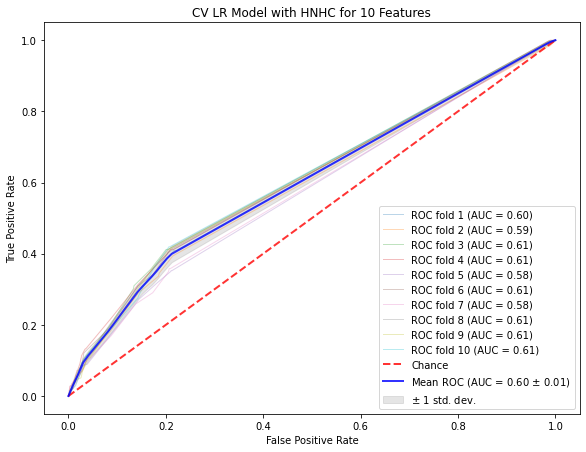

In [33]:
# Subfolder where plots/charts will be saved.
PATH_SUB = f'{images_folder}/{num_features}_features'

# If the folder already exists, pass through. If the folder does not exist, create the folder.
if path.exists(PATH_SUB):
    # Pass through.
    pass
else:
    # Create a folder to save plots/charts in. 
    os.makedirs(f'{images_folder}/{num_features}_features')

# Cross validated ROC/AUC chart, run classifier with cross-validation and plot ROC curves.
cv = StratifiedKFold(n_splits=10)
draw_cv_auc_roc(model_lr_hnhc, cv, cleaned_data_wo_outcome_df_lr_hnhc, target_srs_lr_hnhc, num_features, f'CV LR Model with HNHC for {num_features} Features')

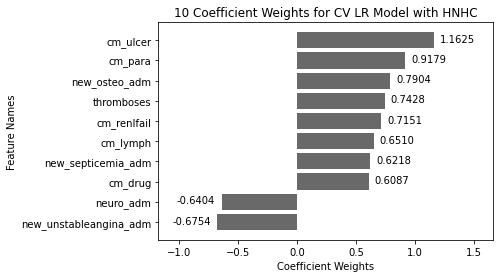

In [38]:
# Grab the coefficient weights using the Logistic Regression model.
for value in model_lr_hnhc.coef_:
    importance_lr_hnhc = sorted(zip(value, X_train_lr_hnhc))

# Graph coefficient weights for Logistic Regression.
value_labels_lr_hnhc = [x[0] for x in importance_lr_hnhc]
feature_names_lr_hnhc = [y[1] for y in importance_lr_hnhc]
plt.barh(feature_names_lr_hnhc, value_labels_lr_hnhc, color='dimgray')
for index, value in enumerate(value_labels_lr_hnhc):
    if value_labels_lr_hnhc[index] >= 0:
        plt.text(value/value_labels_lr_hnhc[index]+value-0.95, index-0.09, str(f'{value:.4f}'), color='black')
    elif value_labels_lr_hnhc[index] < 0:
        plt.text(-value/value_labels_lr_hnhc[index]+value+0.62, index-0.09, str(f'{value:.4f}'), color='black')
plt.xlabel('Coefficient Weights')
plt.xlim((min(value_labels_lr_hnhc)-0.5, max(value_labels_lr_hnhc)+0.5))
plt.ylabel('Feature Names')
plt.title(f'{num_features} Coefficient Weights for CV LR Model with HNHC')
plt.savefig(f'{images_folder}\{num_features}_features\CV_LR_HNHC_Coefficient_Weights_{num_features}', dpi=300)
plt.show()

## Logistic Regression RFE - HNHC without 'los' <a class="anchor" id="lrhnhcwolos"></a> 

[Return to Table of Contents](#contents)

In [39]:
# Use Recursive Feature Elimination (RFE) to select the most important features with Logistic Regression.
model_lr_hnhc_no_los = LogisticRegression(random_state = 42)
X_hnhc_no_los = cleaned_data_wo_outcome_hnhc_no_los
dataset_hnhc_no_los = cleaned_data_hnhc_no_los

cleaned_data_wo_outcome_df_lr_hnhc_no_los, target_srs_lr_hnhc_no_los = rfe_feature_selection(model_lr_hnhc_no_los, num_features, X_hnhc_no_los, y_hnhc, dataset_hnhc_no_los, target_hnhc, readmission_df)

['severe_IBD_hospitalization' 'cm_dmcx' 'cm_lymph' 'cm_para' 'cm_ulcer'
 'pq1_dm_short' 'pq2_perf_appendix' 'new_unstableangina_adm'
 'new_meningitis_adm' 'new_atypicalmyco_adm']


       hnhc_patients  severe_IBD_hospitalization  cm_dmcx  cm_lymph  cm_para  \
0                  0                           0        0         0        0   
3                  0                           0        0         0        0   
4                  1                           0        0         0        0   
9                  0                           0        0         0        0   
10                 0                           0        0         0        0   
...              ...                         ...      ...       ...      ...   
94491              0                           0        0         0        0   
94492              0                           0        0         0        0   
94493              1                           1        0         0        0   
94496              

In [40]:
# Initial model with Logistic Regression.
X_train_lr_hnhc_no_los, X_test_lr_hnhc_no_los, y_train_lr_hnhc_no_los, y_test_lr_hnhc_no_los = train_test_split(cleaned_data_wo_outcome_df_lr_hnhc_no_los, target_srs_lr_hnhc_no_los, random_state=42)
model_lr_hnhc_no_los.fit(X_train_lr_hnhc_no_los, y_train_lr_hnhc_no_los)
print(f'Training Score: {model_lr_hnhc_no_los.score(X_train_lr_hnhc_no_los, y_train_lr_hnhc_no_los)}')
print(f'Testing Score: {model_lr_hnhc_no_los.score(X_test_lr_hnhc_no_los, y_test_lr_hnhc_no_los)}')

Training Score: 0.8993839835728953
Testing Score: 0.9031305375073834


In [41]:
# K-Fold Validation using Logistic Regression.
scores_lr_hnhc_no_los = cross_validate(model_lr_hnhc_no_los, cleaned_data_wo_outcome_df_lr_hnhc_no_los, target_srs_lr_hnhc_no_los, cv=10, scoring=('roc_auc', 'precision','recall', 'accuracy'), return_train_score=True)
scores_df_lr_hnhc_no_los = pd.DataFrame(scores_lr_hnhc_no_los)
scores_df_lr_hnhc_no_los

,fit_time,score_time,test_roc_auc,train_roc_auc,test_precision,train_precision,test_recall,train_recall,test_accuracy,train_accuracy
0,0.217313,0.008975,0.714134,0.715222,0.666667,0.354839,0.004237,0.002591,0.900654,0.900284
1,0.218095,0.009043,0.685640,0.718244,0.500000,0.454545,0.008475,0.003534,0.900443,0.900424
2,0.158326,0.007414,0.705140,0.716201,0.500000,0.387097,0.002123,0.002826,0.900633,0.900309
3,0.218292,0.008979,0.735480,0.712812,0.600000,0.344828,0.006369,0.002355,0.900844,0.900263
4,0.250507,0.009167,0.720255,0.714503,0.000000,0.500000,0.000000,0.004475,0.900000,0.900473
5,0.201400,0.008011,0.726263,0.713703,0.000000,0.461538,0.000000,0.002827,0.900000,0.900450
6,0.194525,0.008975,0.731205,0.713157,0.500000,0.423077,0.002119,0.002591,0.900422,0.900403
7,0.156742,0.008459,0.695863,0.717057,0.500000,0.423077,0.002119,0.002591,0.900422,0.900403
8,0.195098,0.009510,0.711777,0.715458,0.333333,0.454545,0.004237,0.002356,0.900000,0.900450
9,0.165658,0.008819,0.723294,0.714204,0.000000,0.433333,0.000000,0.003062,0.899578,0.900403


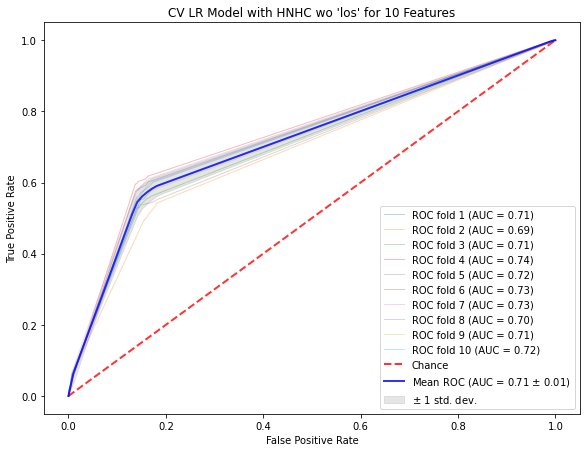

In [42]:
# Cross validated ROC/AUC chart, run classifier with cross-validation and plot ROC curves.
draw_cv_auc_roc(model_lr_hnhc_no_los, cv, cleaned_data_wo_outcome_df_lr_hnhc_no_los, target_srs_lr_hnhc_no_los, num_features, f"CV LR Model with HNHC wo 'los' for {num_features} Features")

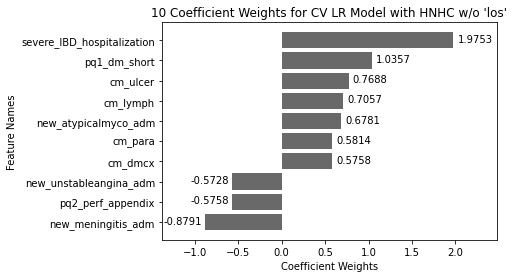

In [43]:
# Grab the coefficient weights using the Logistic Regression model.
for value in model_lr_hnhc_no_los.coef_:
    importance_lr_hnhc_no_los = sorted(zip(value, X_train_lr_hnhc_no_los))

# Graph coefficient weights for Logistic Regression.
value_labels_lr_hnhc_no_los = [x[0] for x in importance_lr_hnhc_no_los]
feature_names_lr_hnhc_no_los = [y[1] for y in importance_lr_hnhc_no_los]
plt.barh(feature_names_lr_hnhc_no_los, value_labels_lr_hnhc_no_los, color='dimgray')
for index, value in enumerate(value_labels_lr_hnhc_no_los):
    if value_labels_lr_hnhc_no_los[index] >= 0:
        plt.text(value/value_labels_lr_hnhc_no_los[index]+value-0.95, index-0.09, str(f'{value:.4f}'), color='black')
    elif value_labels_lr_hnhc_no_los[index] < 0:
        plt.text(-value/value_labels_lr_hnhc_no_los[index]+value+0.52, index-0.09, str(f'{value:.4f}'), color='black')
plt.xlabel('Coefficient Weights')
plt.xlim((min(value_labels_lr_hnhc_no_los)-0.5, max(value_labels_lr_hnhc_no_los)+0.5))
plt.ylabel('Feature Names')
plt.title(f"{num_features} Coefficient Weights for CV LR Model with HNHC w/o 'los'")
plt.savefig(f'{images_folder}\{num_features}_features\CV_LR_HNHC_no_los_Coefficient_Weights_{num_features}', dpi=300)
plt.show()

## Decision Tree Classifier RFE - HNHC <a class="anchor" id="dtchnhc"></a> 

[Return to Table of Contents](#contents)

In [44]:
# Use Recursive Feature Elimination (RFE) to select the most important features with Decision Tree Classifier.
model_dtc_hnhc = DecisionTreeClassifier(random_state = 42, splitter = "best", max_depth = 5)

cleaned_data_wo_outcome_df_dtc_hnhc, target_srs_dtc_hnhc = rfe_feature_selection(model_dtc_hnhc, num_features, X_hnhc, y_hnhc, dataset_hnhc, target_hnhc, readmission_df)

['gi_bleed_adm' 'age' 'los' 'orproc' 'cm_psych' 'cm_renlfail' 'cc_index'
 'chronic_pain' 'frailty_risk_score' 'hosp_bedsize']


       hnhc_patients  gi_bleed_adm  age  los  orproc  cm_psych  cm_renlfail  \
0                  0             0   89    4       0         0            0   
3                  0             0   48    4       1         0            0   
4                  1             0   65    5       0         0            0   
9                  0             0   51    3       1         0            0   
10                 0             0   22    6       1         0            0   
...              ...           ...  ...  ...     ...       ...          ...   
94491              0             0   32    3       0         0            0   
94492              0             0   54    4       1         0            0   
94493              1             0   44    9       1         0            0   
94496              0             0   52    2       1         0            0   
944

In [45]:
# Initial model with Decision Tree Classifier.
X_train_dtc_hnhc, X_test_dtc_hnhc, y_train_dtc_hnhc, y_test_dtc_hnhc = train_test_split(cleaned_data_wo_outcome_df_dtc_hnhc, target_srs_dtc_hnhc, random_state=42)
model_dtc_hnhc.fit(X_train_dtc_hnhc, y_train_dtc_hnhc)
print(f'Training Score: {model_dtc_hnhc.score(X_train_dtc_hnhc, y_train_dtc_hnhc)}')
print(f'Testing Score: {model_dtc_hnhc.score(X_test_dtc_hnhc, y_test_dtc_hnhc)}')

Training Score: 0.9176113189502405
Testing Score: 0.9206817990043035


In [46]:
# K-Fold Validation using Decision Tree Classifier.
scores_dtc_hnhc = cross_validate(model_dtc_hnhc, cleaned_data_wo_outcome_df_dtc_hnhc, target_srs_dtc_hnhc, cv=10, scoring=('roc_auc', 'precision','recall', 'accuracy'), return_train_score=True)
scores_df_dtc_hnhc = pd.DataFrame(scores_dtc_hnhc)
scores_df_dtc_hnhc

,fit_time,score_time,test_roc_auc,train_roc_auc,test_precision,train_precision,test_recall,train_recall,test_accuracy,train_accuracy
0,0.042207,0.013378,0.785252,0.792074,0.861702,0.894416,0.171610,0.207538,0.914786,0.918708
1,0.044738,0.007980,0.767245,0.793990,0.766990,0.850838,0.167373,0.227091,0.912044,0.919130
2,0.040806,0.008978,0.773322,0.793316,0.822581,0.879024,0.216561,0.212200,0.917511,0.918686
3,0.042688,0.008812,0.803214,0.789648,0.788235,0.762544,0.284501,0.254122,0.921308,0.917889
4,0.040463,0.008989,0.780326,0.793498,0.810811,0.880383,0.191083,0.216675,0.915190,0.919108
5,0.040624,0.008816,0.791492,0.791074,0.857143,0.861972,0.216102,0.216254,0.918354,0.918569
6,0.040500,0.007967,0.787126,0.792133,0.869565,0.867240,0.211864,0.213899,0.918354,0.918522
7,0.042859,0.008009,0.771502,0.790031,0.894231,0.908306,0.197034,0.198351,0.917722,0.918241
8,0.040895,0.008976,0.791619,0.791434,0.818792,0.832759,0.258475,0.227562,0.920464,0.918593
9,0.040465,0.009175,0.790967,0.790549,0.738854,0.809041,0.245763,0.244523,0.916245,0.919085


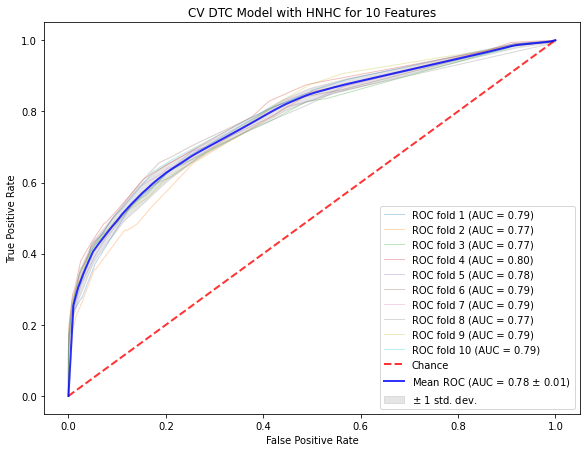

In [47]:
# Cross validated ROC/AUC chart, run classifier with cross-validation and plot ROC curves.
draw_cv_auc_roc(model_dtc_hnhc, cv, cleaned_data_wo_outcome_df_dtc_hnhc, target_srs_dtc_hnhc, num_features, f'CV DTC Model with HNHC for {num_features} Features')

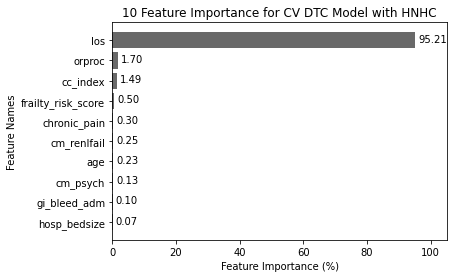

In [48]:
# Grab the feature importance using the cross validation Decision Tree Classifier model.
importance_dtc_hnhc = sorted(zip(model_dtc_hnhc.feature_importances_*100, X_train_dtc_hnhc))

# Graph feature importance for Decision Tree Classifier.
value_labels_dtc_hnhc = [x[0] for x in importance_dtc_hnhc]
feature_names_dtc_hnhc = [y[1] for y in importance_dtc_hnhc]
plt.barh(feature_names_dtc_hnhc, value_labels_dtc_hnhc, color='dimgray')
for index, value in enumerate(value_labels_dtc_hnhc):
    plt.text(value/value_labels_dtc_hnhc[index]+value, index-0.09, str(f'{value:.2f}'), color='black')
plt.xlabel('Feature Importance (%)')
plt.xlim((0, max(value_labels_dtc_hnhc)+10))
plt.ylabel('Feature Names')
plt.title(f'{num_features} Feature Importance for CV DTC Model with HNHC')
plt.savefig(f'{images_folder}\{num_features}_features\CV_DTC_HNHC_Feature_Importance_{num_features}', dpi=300)
plt.show()

## Decision Tree Classifier RFE - HNHC without 'los' <a class="anchor" id="dtchnhcwolos"></a> 

[Return to Table of Contents](#contents)

In [49]:
# Use Recursive Feature Elimination (RFE) to select the most important features with Decision Tree Classifier.
model_dtc_hnhc_no_los = DecisionTreeClassifier(random_state = 42, splitter = "best", max_depth = 5)

cleaned_data_wo_outcome_df_dtc_hnhc_no_los, target_srs_dtc_hnhc_no_los = rfe_feature_selection(model_dtc_hnhc_no_los, num_features, X_hnhc_no_los, y_hnhc, dataset_hnhc_no_los, target_hnhc, readmission_df)

['age' 'orproc' 'payer' 'severe_IBD_hospitalization' 'cm_drug'
 'cm_wghtloss' 'blood_transfusion' 'cc_index' 'new_arrhythmia_adm'
 'frailty_risk_score']


       hnhc_patients  age  orproc  payer  severe_IBD_hospitalization  cm_drug  \
0                  0   89       0    1.0                           0        0   
3                  0   48       1    2.0                           0        0   
4                  1   65       0    1.0                           0        0   
9                  0   51       1    2.0                           0        0   
10                 0   22       1    1.0                           0        0   
...              ...  ...     ...    ...                         ...      ...   
94491              0   32       0    2.0                           0        0   
94492              0   54       1    2.0                           0        0   
94493              1   44       1    2.0                           1        0   
94496              0   52       1  

In [50]:
# Initial model with Decision Tree Classifier.
X_train_dtc_hnhc_no_los, X_test_dtc_hnhc_no_los, y_train_dtc_hnhc_no_los, y_test_dtc_hnhc_no_los = train_test_split(cleaned_data_wo_outcome_df_dtc_hnhc_no_los, target_srs_dtc_hnhc_no_los, random_state=42)
model_dtc_hnhc_no_los.fit(X_train_dtc_hnhc_no_los, y_train_dtc_hnhc_no_los)
print(f'Training Score: {model_dtc_hnhc_no_los.score(X_train_dtc_hnhc_no_los, y_train_dtc_hnhc_no_los)}')
print(f'Testing Score: {model_dtc_hnhc_no_los.score(X_test_dtc_hnhc_no_los, y_test_dtc_hnhc_no_los)}')

Training Score: 0.9016079524654332
Testing Score: 0.9050515289744889


In [51]:
# K-Fold Validation using Decision Tree Classifier.
scores_dtc_hnhc_no_los = cross_validate(model_dtc_hnhc_no_los, cleaned_data_wo_outcome_df_dtc_hnhc_no_los, target_srs_dtc_hnhc_no_los, cv=10, scoring=('roc_auc', 'precision','recall', 'accuracy'), return_train_score=True)
scores_df_dtc_hnhc_no_los = pd.DataFrame(scores_dtc_hnhc_no_los)
scores_df_dtc_hnhc_no_los

,fit_time,score_time,test_roc_auc,train_roc_auc,test_precision,train_precision,test_recall,train_recall,test_accuracy,train_accuracy
0,0.043983,0.009867,0.763680,0.777674,0.511364,0.561547,0.095541,0.112892,0.900950,0.902896
1,0.043112,0.007853,0.743212,0.778340,0.352113,0.583832,0.053079,0.091916,0.896093,0.903060
2,0.035847,0.008974,0.767634,0.776565,0.543689,0.555689,0.118896,0.109357,0.902429,0.902614
3,0.037107,0.008782,0.773716,0.776027,0.583333,0.559880,0.089172,0.088145,0.903062,0.902309
4,0.036607,0.008943,0.759856,0.778129,0.656250,0.572594,0.089172,0.082724,0.904752,0.902520
5,0.037420,0.009296,0.790132,0.774487,0.533333,0.608076,0.050847,0.060349,0.900950,0.902591
6,0.040269,0.008971,0.777159,0.776359,0.526882,0.553350,0.103814,0.105139,0.901373,0.902473
7,0.035706,0.008943,0.765082,0.776262,0.593750,0.558346,0.080508,0.089109,0.902851,0.902309
8,0.037793,0.007979,0.762154,0.777521,0.510870,0.584187,0.099576,0.094059,0.900739,0.903154
9,0.039937,0.010666,0.784418,0.775369,0.545455,0.614458,0.050955,0.048079,0.901352,0.902218


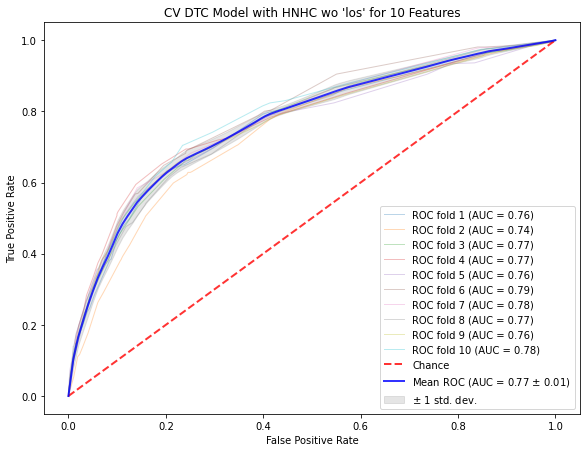

In [52]:
# Cross validated ROC/AUC chart, run classifier with cross-validation and plot ROC curves.
draw_cv_auc_roc(model_dtc_hnhc_no_los, cv, cleaned_data_wo_outcome_df_dtc_hnhc_no_los, target_srs_dtc_hnhc_no_los, num_features, f"CV DTC Model with HNHC wo 'los' for {num_features} Features")

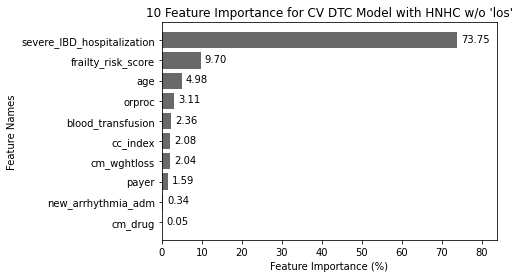

In [53]:
# Grab the feature importance using the cross validation Decision Tree Classifier model.
importance_dtc_hnhc_no_los = sorted(zip(model_dtc_hnhc_no_los.feature_importances_*100, X_train_dtc_hnhc_no_los))

# Graph feature importance for Decision Tree Classifier.
value_labels_dtc_hnhc_no_los = [x[0] for x in importance_dtc_hnhc_no_los]
feature_names_dtc_hnhc_no_los = [y[1] for y in importance_dtc_hnhc_no_los]
plt.barh(feature_names_dtc_hnhc_no_los, value_labels_dtc_hnhc_no_los, color='dimgray')
for index, value in enumerate(value_labels_dtc_hnhc_no_los):
    plt.text(value/value_labels_dtc_hnhc_no_los[index]+value, index-0.09, str(f'{value:.2f}'), color='black')
plt.xlabel('Feature Importance (%)')
plt.xlim((0, max(value_labels_dtc_hnhc_no_los)+10))
plt.ylabel('Feature Names')
plt.title(f"{num_features} Feature Importance for CV DTC Model with HNHC w/o 'los'")
plt.savefig(f'{images_folder}\{num_features}_features\CV_DTC_HNHC_no_los_Feature_Importance_{num_features}', dpi=300)
plt.show()

## XGBoost Classifier RFE - HNHC <a class="anchor" id="xgbchnhc"></a>

[Return to Table of Contents](#contents)

In [54]:
# Use Recursive Feature Elimination (RFE) to select the most important features with XGBClassifier.
model_xgbc_hnhc = XGBClassifier(random_state = 42, verbosity = 0, max_depth = 5)

cleaned_data_wo_outcome_df_xgbc_hnhc, target_srs_xgbc_hnhc = rfe_feature_selection(model_xgbc_hnhc, num_features, X_hnhc, y_hnhc, dataset_hnhc, target_hnhc, readmission_df)

['steroid_use' 'los' 'orproc' 'payer' 'cm_anemdef' 'cm_dmcx' 'cm_drug'
 'cc_index' 'thromboses' 'chronic_pain']


       hnhc_patients  steroid_use  los  orproc  payer  cm_anemdef  cm_dmcx  \
0                  0            0    4       0    1.0           1        0   
3                  0            0    4       1    2.0           0        0   
4                  1            0    5       0    1.0           1        0   
9                  0            0    3       1    2.0           0        0   
10                 0            0    6       1    1.0           0        0   
...              ...          ...  ...     ...    ...         ...      ...   
94491              0            0    3       0    2.0           0        0   
94492              0            0    4       1    2.0           0        0   
94493              1            0    9       1    2.0           0        0   
94496              0            0    2       1    1.0           0        0   
94497              0        

In [55]:
# Initial model with XGBClassifier.
X_train_xgbc_hnhc, X_test_xgbc_hnhc, y_train_xgbc_hnhc, y_test_xgbc_hnhc = train_test_split(cleaned_data_wo_outcome_df_xgbc_hnhc, target_srs_xgbc_hnhc, random_state=42)
model_xgbc_hnhc.fit(X_train_xgbc_hnhc, y_train_xgbc_hnhc)
print(f'Training Score: {model_xgbc_hnhc.score(X_train_xgbc_hnhc, y_train_xgbc_hnhc)}')
print(f'Testing Score: {model_xgbc_hnhc.score(X_test_xgbc_hnhc, y_test_xgbc_hnhc)}')

Training Score: 0.9222776041226662
Testing Score: 0.9168778509883426


In [56]:
# K-Fold Validation using XGBClassifier.
scores_xgbc_hnhc = cross_validate(model_xgbc_hnhc, cleaned_data_wo_outcome_df_xgbc_hnhc, target_srs_xgbc_hnhc, cv=10, scoring=('roc_auc', 'precision','recall', 'accuracy'), return_train_score=True)
scores_df_xgbc_hnhc = pd.DataFrame(scores_xgbc_hnhc)
scores_df_xgbc_hnhc

,fit_time,score_time,test_roc_auc,train_roc_auc,test_precision,train_precision,test_recall,train_recall,test_accuracy,train_accuracy
0,0.598353,0.022898,0.789472,0.822668,0.761538,0.858610,0.210191,0.256187,0.914889,0.921739
1,0.625006,0.022986,0.788115,0.823211,0.676471,0.861090,0.195329,0.264436,0.910665,0.922514
2,0.599234,0.023943,0.792192,0.822967,0.777027,0.848627,0.244161,0.255008,0.917846,0.921293
3,0.586771,0.022298,0.803587,0.822245,0.750000,0.856115,0.235669,0.252416,0.916156,0.921340
4,0.601143,0.024931,0.782686,0.824173,0.759690,0.859265,0.208068,0.259015,0.914678,0.921997
5,0.597560,0.025545,0.811908,0.821835,0.808511,0.847340,0.241525,0.259076,0.918691,0.921599
6,0.601487,0.023785,0.803480,0.823338,0.842105,0.860821,0.237288,0.252240,0.919535,0.921505
7,0.608220,0.023862,0.789148,0.824144,0.805755,0.856349,0.237288,0.254361,0.918268,0.921528
8,0.604032,0.021839,0.803397,0.821969,0.775641,0.862124,0.256356,0.256483,0.918479,0.921904
9,0.599127,0.019905,0.806477,0.821658,0.774194,0.860720,0.254777,0.259251,0.918462,0.922070


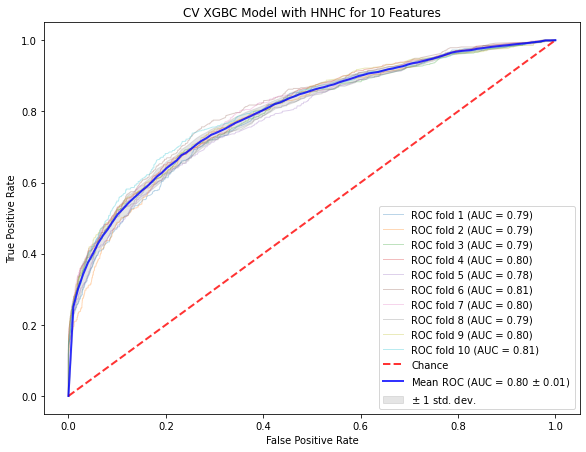

In [57]:
# Cross validated ROC/AUC chart, run classifier with cross-validation and plot ROC curves.
draw_cv_auc_roc(model_xgbc_hnhc, cv, cleaned_data_wo_outcome_df_xgbc_hnhc, target_srs_xgbc_hnhc, num_features, f'CV XGBC Model with HNHC for {num_features} Features')

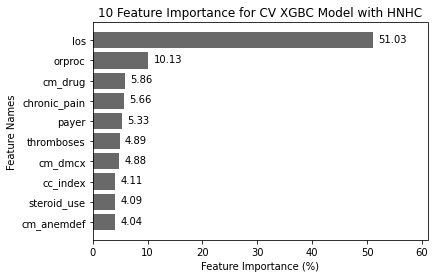

In [58]:
# Grab the feature importance using the cross validation XGBClassifier model.
importance_xgbc_hnhc = sorted(zip(model_xgbc_hnhc.feature_importances_*100, X_train_xgbc_hnhc))

# Graph feature importance for XGBClassifier.
value_labels_xgbc_hnhc = [x[0] for x in importance_xgbc_hnhc]
feature_names_xgbc_hnhc = [y[1] for y in importance_xgbc_hnhc]
plt.barh(feature_names_xgbc_hnhc, value_labels_xgbc_hnhc, color='dimgray')
for index, value in enumerate(value_labels_xgbc_hnhc):
    plt.text(value/value_labels_xgbc_hnhc[index]+value, index-0.09, str(f'{value:.2f}'), color='black')
plt.xlabel('Feature Importance (%)')
plt.xlim((0, max(value_labels_xgbc_hnhc)+10))
plt.ylabel('Feature Names')
plt.title(f'{num_features} Feature Importance for CV XGBC Model with HNHC')
plt.savefig(f'{images_folder}\{num_features}_features\CV_XGBC_HNHC_Feature_Importance_{num_features}', dpi=300)
plt.show()

## XGBoost Classifier RFE - HNHC without 'los' <a class="anchor" id="xgbchnhcwolos"></a>

[Return to Table of Contents](#contents)

In [59]:
# Use Recursive Feature Elimination (RFE) to select the most important features with XGBClassifier.
model_xgbc_hnhc_no_los = XGBClassifier(random_state = 42, verbosity = 0, max_depth = 5)

cleaned_data_wo_outcome_df_xgbc_hnhc_no_los, target_srs_xgbc_hnhc_no_los = rfe_feature_selection(model_xgbc_hnhc_no_los, num_features, X_hnhc_no_los, y_hnhc, dataset_hnhc_no_los, target_hnhc, readmission_df)

['orproc' 'payer' 'severe_IBD_hospitalization' 'cm_dmcx' 'cm_drug'
 'cm_wghtloss' 'blood_transfusion' 'cc_index' 'thromboses' 'chronic_pain']


       hnhc_patients  orproc  payer  severe_IBD_hospitalization  cm_dmcx  \
0                  0       0    1.0                           0        0   
3                  0       1    2.0                           0        0   
4                  1       0    1.0                           0        0   
9                  0       1    2.0                           0        0   
10                 0       1    1.0                           0        0   
...              ...     ...    ...                         ...      ...   
94491              0       0    2.0                           0        0   
94492              0       1    2.0                           0        0   
94493              1       1    2.0                           1        0   
94496              0       1    1.0                           0        0   
94497              0

In [60]:
# Initial model with XGBClassifier.
X_train_xgbc_hnhc_no_los, X_test_xgbc_hnhc_no_los, y_train_xgbc_hnhc_no_los, y_test_xgbc_hnhc_no_los = train_test_split(cleaned_data_wo_outcome_df_xgbc_hnhc_no_los, target_srs_xgbc_hnhc_no_los, random_state=42)
model_xgbc_hnhc_no_los.fit(X_train_xgbc_hnhc_no_los, y_train_xgbc_hnhc_no_los)
print(f'Training Score: {model_xgbc_hnhc_no_los.score(X_train_xgbc_hnhc_no_los, y_train_xgbc_hnhc_no_los)}')
print(f'Testing Score: {model_xgbc_hnhc_no_los.score(X_test_xgbc_hnhc_no_los, y_test_xgbc_hnhc_no_los)}')

Training Score: 0.9043676607248459
Testing Score: 0.9028552120290589


In [61]:
# K-Fold Validation using XGBClassifier.
scores_xgbc_hnhc_no_los = cross_validate(model_xgbc_hnhc_no_los, cleaned_data_wo_outcome_df_xgbc_hnhc_no_los, target_srs_xgbc_hnhc_no_los, cv=10, scoring=('roc_auc', 'precision','recall', 'accuracy'), return_train_score=True)
scores_df_xgbc_hnhc_no_los = pd.DataFrame(scores_xgbc_hnhc_no_los)
scores_df_xgbc_hnhc_no_los

,fit_time,score_time,test_roc_auc,train_roc_auc,test_precision,train_precision,test_recall,train_recall,test_accuracy,train_accuracy
0,0.525542,0.029184,0.762243,0.785946,0.615385,0.632424,0.084926,0.092859,0.903696,0.904304
1,0.533007,0.022026,0.751546,0.786802,0.352941,0.658430,0.063694,0.106764,0.895248,0.905547
2,0.528022,0.023597,0.774894,0.784861,0.514286,0.656250,0.076433,0.094037,0.900950,0.904890
3,0.503518,0.030640,0.770488,0.786139,0.423077,0.688645,0.070064,0.088617,0.897994,0.905266
4,0.514029,0.021461,0.748475,0.787752,0.437500,0.647577,0.059448,0.103936,0.898838,0.905149
5,0.523595,0.021003,0.794493,0.782718,0.500000,0.653310,0.074153,0.088402,0.900317,0.904585
6,0.511571,0.019942,0.781987,0.783411,0.622642,0.639932,0.069915,0.088402,0.903062,0.904304
7,0.520560,0.015989,0.758525,0.786137,0.515625,0.655987,0.069915,0.091702,0.900739,0.904797
8,0.524034,0.020092,0.762127,0.786096,0.459770,0.645551,0.084746,0.100896,0.898838,0.904984
9,0.509955,0.022106,0.778642,0.783533,0.459016,0.673321,0.059448,0.087438,0.899451,0.904916


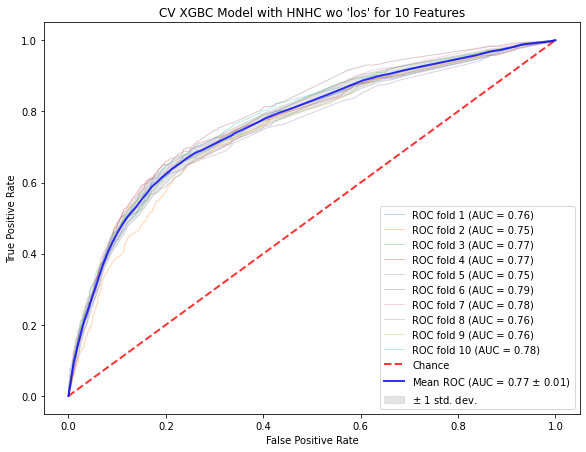

In [62]:
# Cross validated ROC/AUC chart, run classifier with cross-validation and plot ROC curves.
draw_cv_auc_roc(model_xgbc_hnhc_no_los, cv, cleaned_data_wo_outcome_df_xgbc_hnhc_no_los, target_srs_xgbc_hnhc_no_los, num_features, f"CV XGBC Model with HNHC wo 'los' for {num_features} Features")

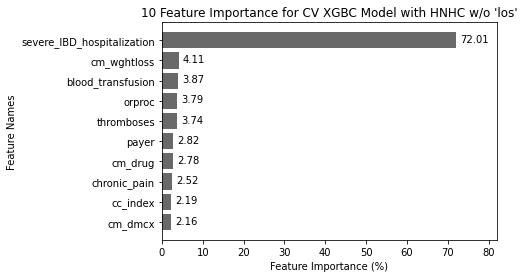

In [63]:
# Grab the feature importance using the cross validation XGBClassifier model.
importance_xgbc_hnhc_no_los = sorted(zip(model_xgbc_hnhc_no_los.feature_importances_*100, X_train_xgbc_hnhc_no_los))

# Graph feature importance for XGBClassifier.
value_labels_xgbc_hnhc_no_los = [x[0] for x in importance_xgbc_hnhc_no_los]
feature_names_xgbc_hnhc_no_los = [y[1] for y in importance_xgbc_hnhc_no_los] 
plt.barh(feature_names_xgbc_hnhc_no_los, value_labels_xgbc_hnhc_no_los, color='dimgray')
for index, value in enumerate(value_labels_xgbc_hnhc_no_los):
    plt.text(value/value_labels_xgbc_hnhc_no_los[index]+value, index-0.09, str(f'{value:.2f}'), color='black')
plt.xlabel('Feature Importance (%)')
plt.xlim((0, max(value_labels_xgbc_hnhc_no_los)+10))
plt.ylabel('Feature Names')
plt.title(f"{num_features} Feature Importance for CV XGBC Model with HNHC w/o 'los'")
plt.savefig(f'{images_folder}\{num_features}_features\CV_XGBC_HNHC_no_los_Feature_Importance_{num_features}', dpi=300)
plt.show()

## Target: READM_NINETY_DAYS <a class="anchor" id="ninety"></a> 

[Return to Table of Contents](#contents)

## Logistic Regression RFE - READM_NINETY_DAYS <a class="anchor" id="lrninety"></a> 

[Return to Table of Contents](#contents)

In [64]:
# Use Recursive Feature Elimination (RFE) to select the most important features with Logistic Regression.
model_lr_ninety = LogisticRegression(random_state = 42)
X_ninety = cleaned_data_wo_outcome_ninety
y_ninety = target_ninety
dataset_ninety = cleaned_data_ninety
target_ninety = 'has_90_day_readm'
cleaned_data_wo_outcome_df_lr_ninety, target_srs_lr_ninety = rfe_feature_selection(model_lr_ninety, num_features, X_ninety, y_ninety, dataset_ninety, target_ninety, readmission_df)

['severe_IBD_hospitalization' 'cm_dmcx' 'cm_lymph' 'cm_tumor'
 'pq14_diabeteswocomp' 'pq16_dm_amputate' 'new_cardiacarrest_adm'
 'new_fungal_adm' 'new_pcp_adm' 'chronic_pain']


       has_90_day_readm  severe_IBD_hospitalization  cm_dmcx  cm_lymph  \
0                   0.0                           0        0         0   
3                   0.0                           0        0         0   
4                   1.0                           0        0         0   
9                   0.0                           0        0         0   
10                  0.0                           0        0         0   
...                 ...                         ...      ...       ...   
94491               0.0                           0        0         0   
94492               0.0                           0        0         0   
94493               1.0                           1        0         0   
94496               0.0                           0        0         0   
94497   

In [65]:
# Initial model with Logistic Regression.
X_train_lr_ninety, X_test_lr_ninety, y_train_lr_ninety, y_test_lr_ninety = train_test_split(cleaned_data_wo_outcome_df_lr_ninety, target_srs_lr_ninety, random_state=42)
model_lr_ninety.fit(X_train_lr_ninety, y_train_lr_ninety)
print(f'Training Score: {model_lr_ninety.score(X_train_lr_ninety, y_train_lr_ninety)}')
print(f'Testing Score: {model_lr_ninety.score(X_test_lr_ninety, y_test_lr_ninety)}')

Training Score: 0.6892914404658097
Testing Score: 0.6931060669985655


In [66]:
# K-Fold Validation using Logistic Regression.
scores_lr_ninety = cross_validate(model_lr_ninety, cleaned_data_wo_outcome_df_lr_ninety, target_srs_lr_ninety, cv=10, scoring=('roc_auc', 'precision','recall', 'accuracy'), return_train_score=True)
scores_df_lr_ninety = pd.DataFrame(scores_lr_ninety)
scores_df_lr_ninety

,fit_time,score_time,test_roc_auc,train_roc_auc,test_precision,train_precision,test_recall,train_recall,test_accuracy,train_accuracy
0,0.203516,0.008975,0.553234,0.552356,0.433333,0.484594,0.008862,0.013108,0.689728,0.690373
1,0.153684,0.007979,0.549456,0.552785,0.574713,0.477759,0.034083,0.021973,0.693314,0.689998
2,0.167574,0.008446,0.537455,0.554116,0.417910,0.496100,0.019100,0.024093,0.688397,0.690497
3,0.159444,0.008897,0.555379,0.552280,0.467532,0.492038,0.024557,0.023411,0.689662,0.690380
4,0.121427,0.008492,0.546787,0.553233,0.361111,0.501577,0.017735,0.024093,0.686498,0.690661
5,0.166790,0.007976,0.560425,0.551676,0.508197,0.482115,0.021146,0.023487,0.690928,0.690075
6,0.205098,0.008479,0.556263,0.552180,0.485714,0.491228,0.023192,0.023335,0.690295,0.690357
7,0.169936,0.010103,0.553429,0.552477,0.481013,0.487138,0.025903,0.022958,0.689873,0.690263
8,0.151253,0.008575,0.552787,0.552781,0.511111,0.463592,0.031357,0.028944,0.690928,0.689232
9,0.134887,0.009479,0.554506,0.552379,0.559322,0.480974,0.022495,0.023943,0.691983,0.690052


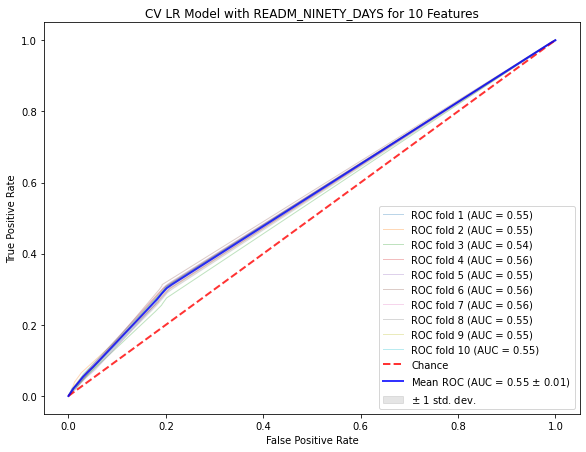

In [67]:
# Cross validated ROC/AUC chart, run classifier with cross-validation and plot ROC curves.
draw_cv_auc_roc(model_lr_ninety, cv, cleaned_data_wo_outcome_df_lr_ninety, target_srs_lr_ninety, num_features, f'CV LR Model with READM_NINETY_DAYS for {num_features} Features')

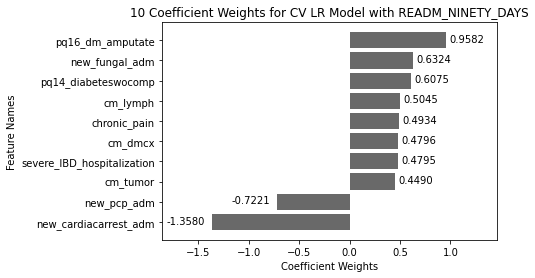

In [68]:
# Grab the coefficient weights using the Logistic Regression model.
for value in model_lr_ninety.coef_:
    importance_lr_ninety = sorted(zip(value, X_train_lr_ninety))

# Graph coefficient weights for Logistic Regression.
value_labels_lr_ninety = [x[0] for x in importance_lr_ninety]
feature_names_lr_ninety = [y[1] for y in importance_lr_ninety]
plt.barh(feature_names_lr_ninety, value_labels_lr_ninety, color='dimgray')
for index, value in enumerate(value_labels_lr_ninety):
    if value_labels_lr_ninety[index] >= 0:
        plt.text(value/value_labels_lr_ninety[index]+value-0.97, index-0.09, str(f'{value:.4f}'), color='black')
    elif value_labels_lr_ninety[index] < 0:
        plt.text(-value/value_labels_lr_ninety[index]+value+0.55, index-0.09, str(f'{value:.4f}'), color='black')
plt.xlabel('Coefficient Weights')
plt.xlim((min(value_labels_lr_ninety)-0.5, max(value_labels_lr_ninety)+0.5))
plt.ylabel('Feature Names')
plt.title(f"{num_features} Coefficient Weights for CV LR Model with READM_NINETY_DAYS")
plt.savefig(f'{images_folder}\{num_features}_features\CV_LR_READM_NINETY_DAYS_Coefficient_Weights_{num_features}', dpi=300)
plt.show()

## Decision Tree Classifier RFE - READM_NINETY_DAYS <a class="anchor" id="dtcninety"></a> 

[Return to Table of Contents](#contents)

In [69]:
# Use Recursive Feature Elimination (RFE) to select the most important features with Decision Tree Classifier.
model_dtc_ninety = DecisionTreeClassifier(random_state = 42, splitter = "best", max_depth = 5)

cleaned_data_wo_outcome_df_dtc_ninety, target_srs_dtc_ninety = rfe_feature_selection(model_dtc_ninety, num_features, X_ninety, y_ninety, dataset_ninety, target_ninety, readmission_df)

['steroid_use' 'age' 'los' 'elective' 'orproc' 'payer' 'cm_anemdef'
 'cm_renlfail' 'ibd_procedures' 'cc_index']


       has_90_day_readm  steroid_use  age  los  elective  orproc  payer  \
0                   0.0            0   89    4       0.0       0    1.0   
3                   0.0            0   48    4       1.0       1    2.0   
4                   1.0            0   65    5       0.0       0    1.0   
9                   0.0            0   51    3       0.0       1    2.0   
10                  0.0            0   22    6       1.0       1    1.0   
...                 ...          ...  ...  ...       ...     ...    ...   
94491               0.0            0   32    3       0.0       0    2.0   
94492               0.0            0   54    4       1.0       1    2.0   
94493               1.0            0   44    9       1.0       1    2.0   
94496               0.0            0   52    2       1.0       1    1.0   
94497               0.0            0   72    4       0.0     

In [70]:
# Initial model with Decision Tree Classifier.
X_train_dtc_ninety, X_test_dtc_ninety, y_train_dtc_ninety, y_test_dtc_ninety = train_test_split(cleaned_data_wo_outcome_df_dtc_ninety, target_srs_dtc_ninety, random_state=42)
model_dtc_ninety.fit(X_train_dtc_ninety, y_train_dtc_ninety)
print(f'Training Score: {model_dtc_ninety.score(X_train_dtc_ninety, y_train_dtc_ninety)}')
print(f'Testing Score: {model_dtc_ninety.score(X_test_dtc_ninety, y_test_dtc_ninety)}')

Training Score: 0.6917439467824225
Testing Score: 0.6918653813630983


In [71]:
# K-Fold Validation using Decision Tree Classifier.
scores_dtc_ninety = cross_validate(model_dtc_ninety, cleaned_data_wo_outcome_df_dtc_ninety, target_srs_dtc_ninety, cv=10, scoring=('roc_auc', 'precision','recall', 'accuracy'), return_train_score=True)
scores_df_dtc_ninety = pd.DataFrame(scores_dtc_ninety)
scores_df_dtc_ninety

,fit_time,score_time,test_roc_auc,train_roc_auc,test_precision,train_precision,test_recall,train_recall,test_accuracy,train_accuracy
0,0.044755,0.010676,0.621671,0.627341,0.427083,0.550802,0.027986,0.039077,0.687381,0.692662
1,0.042153,0.008416,0.618805,0.627976,0.523810,0.585366,0.015017,0.014569,0.690763,0.691746
2,0.035407,0.009215,0.616884,0.627584,0.339286,0.570156,0.012969,0.019425,0.686536,0.691910
3,0.035395,0.008975,0.625388,0.627403,0.510204,0.550898,0.017077,0.020941,0.690698,0.691612
4,0.035806,0.008817,0.621124,0.627521,0.450980,0.559068,0.015710,0.025493,0.689429,0.692082
5,0.035030,0.009213,0.623475,0.627585,0.511111,0.547120,0.015710,0.015857,0.690698,0.691260
6,0.037236,0.008279,0.613575,0.628810,0.415493,0.509682,0.040301,0.055918,0.685412,0.691072
7,0.036294,0.008976,0.618571,0.628062,0.460526,0.527547,0.047814,0.053035,0.687949,0.692129
8,0.036372,0.008976,0.630291,0.626353,0.545455,0.589286,0.004098,0.005008,0.690698,0.690884
9,0.035749,0.008883,0.607594,0.629216,0.520000,0.616788,0.017747,0.012823,0.690698,0.691941


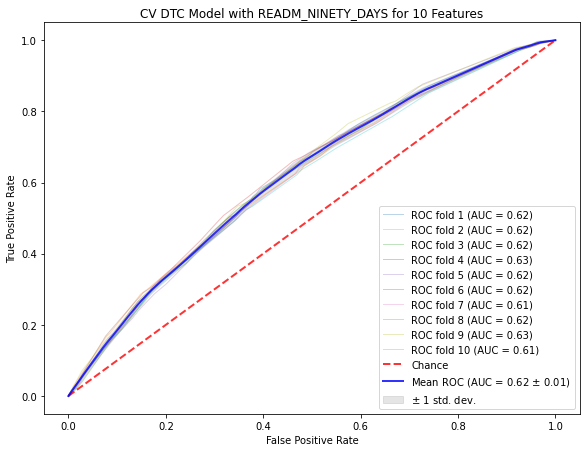

In [72]:
# Cross validated ROC/AUC chart, run classifier with cross-validation and plot ROC curves.
draw_cv_auc_roc(model_dtc_ninety, cv, cleaned_data_wo_outcome_df_dtc_ninety, target_srs_dtc_ninety, num_features, f'CV DTC Model with READM_NINETY_DAYS for {num_features} Features')

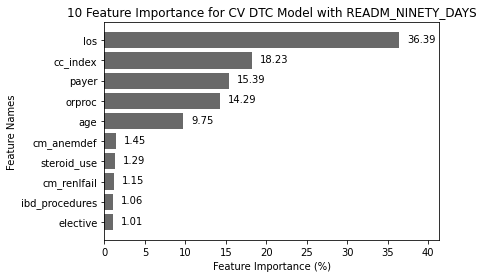

In [73]:
# Grab the feature importance using the cross validation Decision Tree Classifier model.
importance_dtc_ninety = sorted(zip(model_dtc_ninety.feature_importances_*100, X_train_dtc_ninety))

# Graph feature importance for Decision Tree Classifier.
value_labels_dtc_ninety = [x[0] for x in importance_dtc_ninety]
feature_names_dtc_ninety = [y[1] for y in importance_dtc_ninety]
plt.barh(feature_names_dtc_ninety, value_labels_dtc_ninety, color='dimgray')
for index, value in enumerate(value_labels_dtc_ninety):
    plt.text(value/value_labels_dtc_ninety[index]+value, index-0.09, str(f'{value:.2f}'), color='black')
plt.xlabel('Feature Importance (%)')
plt.xlim((0, max(value_labels_dtc_ninety)+5))
plt.ylabel('Feature Names')
plt.title(f"{num_features} Feature Importance for CV DTC Model with READM_NINETY_DAYS")
plt.savefig(f'{images_folder}\{num_features}_features\CV_DTC_READM_NINETY_DAYS_Feature_Importance_{num_features}', dpi=300)
plt.show()

## XGBoost Classifier RFE - READM_NINETY_DAYS <a class="anchor" id="xgbcninety"></a> 

[Return to Table of Contents](#contents)

In [74]:
# Use Recursive Feature Elimination (RFE) to select the most important features with XGBClassifier.
model_xgbc_ninety = XGBClassifier(random_state = 42, verbosity = 0, max_depth = 5)
 
cleaned_data_wo_outcome_df_xgbc_ninety, target_srs_xgbc_ninety = rfe_feature_selection(model_xgbc_ninety, num_features, X_ninety, y_ninety, dataset_ninety, target_ninety, readmission_df)

['steroid_use' 'los' 'elective' 'orproc' 'payer' 'cm_drug'
 'ibd_procedures' 'cc_index' 'thromboses' 'ibd_specific_adm']


       has_90_day_readm  steroid_use  los  elective  orproc  payer  cm_drug  \
0                   0.0            0    4       0.0       0    1.0        0   
3                   0.0            0    4       1.0       1    2.0        0   
4                   1.0            0    5       0.0       0    1.0        0   
9                   0.0            0    3       0.0       1    2.0        0   
10                  0.0            0    6       1.0       1    1.0        0   
...                 ...          ...  ...       ...     ...    ...      ...   
94491               0.0            0    3       0.0       0    2.0        0   
94492               0.0            0    4       1.0       1    2.0        0   
94493               1.0            0    9       1.0       1    2.0        0   
94496               0.0            0    2       1.0       1    1.0        0   
94497   

In [75]:
# Initial model with XGBClassifier.
X_train_xgbc_ninety, X_test_xgbc_ninety, y_train_xgbc_ninety, y_test_xgbc_ninety = train_test_split(cleaned_data_wo_outcome_df_xgbc_ninety, target_srs_xgbc_ninety, random_state=42)
model_xgbc_ninety.fit(X_train_xgbc_ninety, y_train_xgbc_ninety)
print(f'Training Score: {model_xgbc_ninety.score(X_train_xgbc_ninety, y_train_xgbc_ninety)}')
print(f'Testing Score: {model_xgbc_ninety.score(X_test_xgbc_ninety, y_test_xgbc_ninety)}')

Training Score: 0.7073033232798714
Testing Score: 0.689328598004397


In [76]:
# K-Fold Validation using XGBClassifier.
scores_xgbc_ninety = cross_validate(model_xgbc_ninety, cleaned_data_wo_outcome_df_xgbc_ninety, target_srs_xgbc_ninety, cv=10, scoring=('roc_auc', 'precision','recall', 'accuracy'), return_train_score=True)
scores_df_xgbc_ninety = pd.DataFrame(scores_xgbc_ninety)
scores_df_xgbc_ninety

,fit_time,score_time,test_roc_auc,train_roc_auc,test_precision,train_precision,test_recall,train_recall,test_accuracy,train_accuracy
0,0.587154,0.023774,0.642556,0.662868,0.519048,0.677720,0.074403,0.099249,0.692031,0.706544
1,0.604860,0.023057,0.626480,0.664143,0.466346,0.679870,0.066212,0.095075,0.687381,0.706004
2,0.591180,0.023756,0.623859,0.665704,0.406393,0.674488,0.060751,0.102512,0.681674,0.706850
3,0.602314,0.024757,0.638319,0.664339,0.483568,0.669933,0.070355,0.098558,0.689006,0.705893
4,0.592515,0.021137,0.627811,0.665958,0.488281,0.658251,0.085383,0.110774,0.689218,0.706903
5,0.592247,0.019864,0.638075,0.664069,0.464286,0.687225,0.062158,0.094689,0.687526,0.706387
6,0.590338,0.021782,0.624067,0.664505,0.497382,0.683792,0.064891,0.097951,0.690275,0.706716
7,0.594119,0.022293,0.635579,0.663573,0.510309,0.683060,0.067623,0.094841,0.691332,0.706152
8,0.592248,0.021867,0.628060,0.664492,0.519149,0.677991,0.083333,0.104476,0.692389,0.707397
9,0.596278,0.026835,0.612541,0.666404,0.444444,0.683029,0.065529,0.099249,0.685201,0.706903


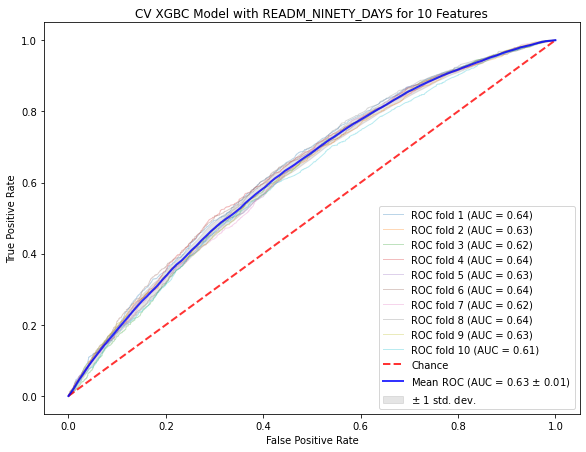

In [77]:
# Cross validated ROC/AUC chart, run classifier with cross-validation and plot ROC curves.
draw_cv_auc_roc(model_xgbc_ninety, cv, cleaned_data_wo_outcome_df_xgbc_ninety, target_srs_xgbc_ninety, num_features, f'CV XGBC Model with READM_NINETY_DAYS for {num_features} Features')

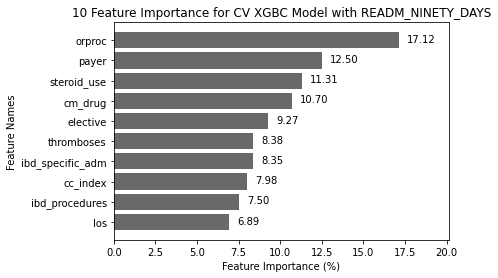

In [85]:
# Grab the feature importance using the cross validation XGBClassifier model.
importance_xgbc_ninety = sorted(zip(model_xgbc_ninety.feature_importances_*100, X_train_xgbc_ninety))

# Graph feature importance for XGBClassifier.
value_labels_xgbc_ninety = [x[0] for x in importance_xgbc_ninety]
feature_names_xgbc_ninety = [y[1] for y in importance_xgbc_ninety]
plt.barh(feature_names_xgbc_ninety, value_labels_xgbc_ninety, color='dimgray')
for index, value in enumerate(value_labels_xgbc_ninety):
    plt.text(value/value_labels_xgbc_ninety[index]+value-0.5, index-0.09, str(f'{value:.2f}'), color='black')
plt.xlabel('Feature Importance (%)')
plt.xlim((0, max(value_labels_xgbc_ninety)+3))
plt.ylabel('Feature Names')
plt.title(f"{num_features} Feature Importance for CV XGBC Model with READM_NINETY_DAYS")
plt.savefig(f'{images_folder}\{num_features}_features\CV_XGBC_READM_NINETY_DAYS_Feature_Importance_{num_features}', dpi=300)
plt.show()